### El market_caps:

O "capitalización de mercado" es un término utilizado en el ámbito de las criptomonedas y se refiere al valor total de mercado de una criptomoneda específica en un momento dado. Representa la suma de todos los tokens o monedas de una criptomoneda en circulación multiplicado por el precio actual de cada token.

La capitalización de mercado es una medida importante que se utiliza para evaluar el tamaño y la popularidad de una criptomoneda en comparación con otras. Una capitalización de mercado más alta generalmente indica que una criptomoneda tiene una mayor adopción y valoración en el mercado.

Es importante tener en cuenta que la capitalización de mercado puede fluctuar ampliamente debido a los cambios en el precio de la criptomoneda y en la cantidad de tokens en circulación. También es importante considerar otros factores y métricas al evaluar una criptomoneda, como el volumen de operaciones, la liquidez, la tecnología subyacente y el equipo de desarrollo.

En el contexto del código que proporcionaste, "market_caps" se refiere a los datos de capitalización de mercado históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin.

### Total volumes:

O "volúmenes totales" se refiere al volumen total de transacciones realizadas con una criptomoneda específica en un momento dado. Representa la suma de todos los volúmenes de transacciones en la criptomoneda durante un período de tiempo determinado.

El volumen de transacciones es una métrica importante en el mercado de las criptomonedas, ya que proporciona información sobre la liquidez y la actividad de negociación de una criptomoneda. Un mayor volumen de transacciones generalmente indica una mayor actividad comercial y una mayor liquidez en el mercado, lo que puede ser un indicador de interés y confianza en la criptomoneda.

Es importante tener en cuenta que el volumen de transacciones puede variar ampliamente de un momento a otro y puede influir en la volatilidad de los precios de las criptomonedas. Un alto volumen de transacciones puede indicar una mayor actividad especulativa y comercial, mientras que un bajo volumen puede indicar menor interés o actividad en el mercado.

En el contexto del código que proporcionaste, "total_volumes" se refiere a los datos de volúmenes totales históricos de Bitcoin en función del tiempo. Estos datos se obtienen de la API de CoinGecko y se utilizan para construir un dataframe que contiene la información histórica de Bitcoin, incluido el volumen total de transacciones.

In [185]:
import pandas as pd
import requests

bitcoin_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})

# Mostrar las últimas 50 filas del dataframe
print(df_bit.head(50))
print(df_bit.tail(50))

    timestamp    prices   market_caps  total_volumes
0  2013-04-28  135.3000  1.500518e+09            0.0
1  2013-04-29  141.9600  1.575032e+09            0.0
2  2013-04-30  135.3000  1.501657e+09            0.0
3  2013-05-01  117.0000  1.298952e+09            0.0
4  2013-05-02  103.4300  1.148668e+09            0.0
5  2013-05-03   91.0100  1.011066e+09            0.0
6  2013-05-04  111.2500  1.236352e+09            0.0
7  2013-05-05  116.7900  1.298378e+09            0.0
8  2013-05-06  118.3300  1.315992e+09            0.0
9  2013-05-07  106.4000  1.183766e+09            0.0
10 2013-05-08  112.6400  1.253655e+09            0.0
11 2013-05-09  113.0000  1.258131e+09            0.0
12 2013-05-10  118.7800  1.322989e+09            0.0
13 2013-05-11  113.0100  1.259239e+09            0.0
14 2013-05-12  114.7130  1.278709e+09            0.0
15 2013-05-13  117.1800  1.306721e+09            0.0
16 2013-05-14  114.5000  1.277279e+09            0.0
17 2013-05-15  114.1560  1.273850e+09         

In [186]:
df_bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      3728 non-null   datetime64[ns]
 1   prices         3728 non-null   float64       
 2   market_caps    3727 non-null   float64       
 3   total_volumes  3728 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 116.6 KB


In [187]:
df_bit.isnull().sum()

timestamp        0
prices           0
market_caps      1
total_volumes    0
dtype: int64

In [188]:
df_bit.drop_duplicates()

,timestamp,prices,market_caps,total_volumes
0,2013-04-28 00:00:00,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
3723,2023-07-10 00:00:00,30169.870657,5.858840e+11,7.559670e+09
3724,2023-07-11 00:00:00,30394.281146,5.903119e+11,1.283522e+10
3725,2023-07-12 00:00:00,30620.814247,5.947492e+11,1.175342e+10
3726,2023-07-13 00:00:00,30407.416314,5.906294e+11,1.307256e+10


In [189]:
df_bit = df_bit.dropna()

In [190]:
df_bit.describe()

,timestamp,prices,market_caps,total_volumes
count,3727,3727.000000,3.727000e+03,3.727000e+03
mean,2018-06-06 10:25:50.815223040,11860.648688,2.202521e+11,1.413860e+10
min,2013-04-28 00:00:00,67.809000,7.713681e+08,0.000000e+00
25%,2015-11-17 12:00:00,567.225000,7.302328e+09,1.302747e+08
50%,2018-06-07 00:00:00,6312.877243,1.089040e+11,3.522949e+09
75%,2020-12-24 12:00:00,17077.415328,3.242881e+11,2.433420e+10
max,2023-07-13 20:11:24,67617.015545,1.278798e+12,1.788941e+11
std,NaN,15580.295793,2.952222e+11,1.845325e+10


______________________________________________________________________________________

## Transpuesta:

In [191]:
df_bit

,timestamp,prices,market_caps,total_volumes
0,2013-04-28 00:00:00,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
3723,2023-07-10 00:00:00,30169.870657,5.858840e+11,7.559670e+09
3724,2023-07-11 00:00:00,30394.281146,5.903119e+11,1.283522e+10
3725,2023-07-12 00:00:00,30620.814247,5.947492e+11,1.175342e+10
3726,2023-07-13 00:00:00,30407.416314,5.906294e+11,1.307256e+10


In [192]:
df_bit_t = df_bit.T


In [193]:
df_bit_t

,0,1,2,3,4,5,6,7,8,9,...,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727
timestamp,2013-04-28 00:00:00,2013-04-29 00:00:00,2013-04-30 00:00:00,2013-05-01 00:00:00,2013-05-02 00:00:00,2013-05-03 00:00:00,2013-05-04 00:00:00,2013-05-05 00:00:00,2013-05-06 00:00:00,2013-05-07 00:00:00,...,2023-07-05 00:00:00,2023-07-06 00:00:00,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-13 20:11:24
prices,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,30775.624022,30484.793774,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31607.694333
market_caps,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,598449423994.125244,592386606697.315308,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,614196763744.541382
total_volumes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12403890725.264545,10260132141.46154,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,22431017887.201172


__________________________________________________________________________________________________________________________________________

# Grafico los inputs

In [194]:
import pandas as pd
import matplotlib.pyplot as plt


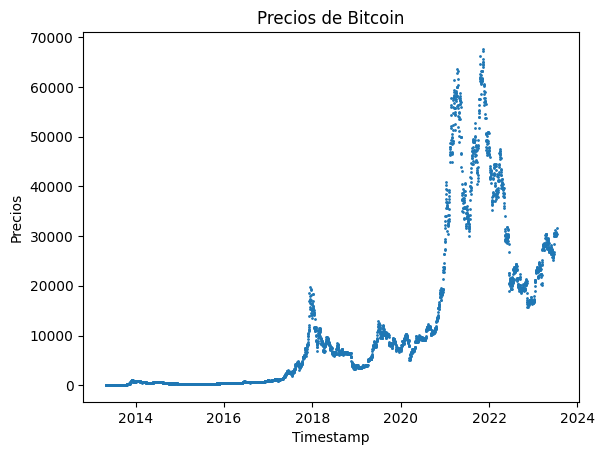

In [195]:
# Ploteamos
x = df_bit['timestamp']
y = df_bit['prices']

plt.scatter(x, y, s=1)
plt.title("Precios de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Precios")
plt.show()

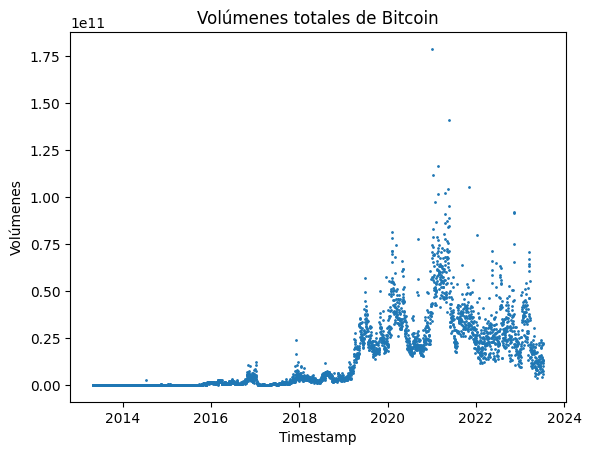

In [196]:
# Ploteamos
x = df_bit['timestamp']
y = df_bit['total_volumes']

plt.scatter(x, y, s=1)
plt.title("Volúmenes totales de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Volúmenes")
plt.show()

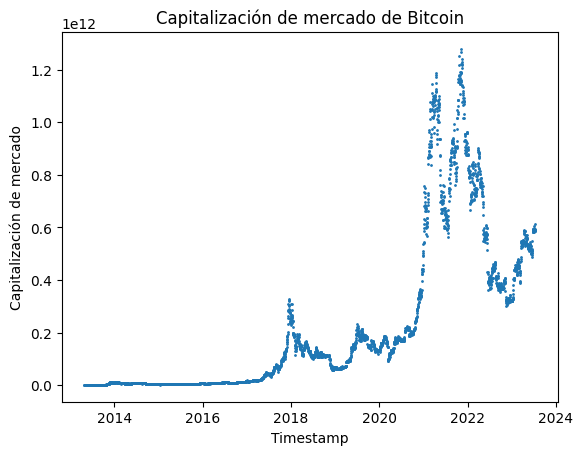

In [197]:
# Ploteamos
x = df_bit['timestamp']
y = df_bit['market_caps']

plt.scatter(x, y, s=1)
plt.title("Capitalización de mercado de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Capitalización de mercado")
plt.show()

## Resultados de este ETL, hasta ahora:

In [198]:
df_bit.tail(10)

,timestamp,prices,market_caps,total_volumes
3718,2023-07-05 00:00:00,30775.624022,5.984494e+11,1.240389e+10
3719,2023-07-06 00:00:00,30484.793774,5.923866e+11,1.026013e+10
3720,2023-07-07 00:00:00,29990.055151,5.834290e+11,2.177671e+10
3721,2023-07-08 00:00:00,30315.265402,5.888114e+11,1.301851e+10
3722,2023-07-09 00:00:00,30264.197345,5.876784e+11,5.608542e+09
3723,2023-07-10 00:00:00,30169.870657,5.858840e+11,7.559670e+09
3724,2023-07-11 00:00:00,30394.281146,5.903119e+11,1.283522e+10
3725,2023-07-12 00:00:00,30620.814247,5.947492e+11,1.175342e+10
3726,2023-07-13 00:00:00,30407.416314,5.906294e+11,1.307256e+10
3727,2023-07-13 20:11:24,31607.694333,6.141968e+11,2.243102e+10


In [199]:
df_bit_t = df_bit.T

In [200]:
df_bit_t.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727
timestamp,2013-04-28 00:00:00,2013-04-29 00:00:00,2013-04-30 00:00:00,2013-05-01 00:00:00,2013-05-02 00:00:00,2013-05-03 00:00:00,2013-05-04 00:00:00,2013-05-05 00:00:00,2013-05-06 00:00:00,2013-05-07 00:00:00,...,2023-07-05 00:00:00,2023-07-06 00:00:00,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-13 20:11:24
prices,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,30775.624022,30484.793774,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31607.694333
market_caps,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,598449423994.125244,592386606697.315308,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,614196763744.541382
total_volumes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12403890725.264545,10260132141.46154,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,22431017887.201172


___________________________________________________________________________________________________________________________________________________

# Preparacion del dataframe para modelo de Regresion lineal:

In [201]:
# Almacenar los índices en una variable
indices = df_bit_t.index

In [202]:
# Almacenar los nombres de las filas en una variable
df_bit_t_row_names = df_bit_t.index

# Eliminar los nombres de las filas del índice del DataFrame
df_bit_t.reset_index(drop=True, inplace=True)

# Imprimir los nombres de las filas
print(df_bit_t_row_names)

Index(['timestamp', 'prices', 'market_caps', 'total_volumes'], dtype='object')


In [203]:
df_bit_t

,0,1,2,3,4,5,6,7,8,9,...,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727
0,2013-04-28 00:00:00,2013-04-29 00:00:00,2013-04-30 00:00:00,2013-05-01 00:00:00,2013-05-02 00:00:00,2013-05-03 00:00:00,2013-05-04 00:00:00,2013-05-05 00:00:00,2013-05-06 00:00:00,2013-05-07 00:00:00,...,2023-07-05 00:00:00,2023-07-06 00:00:00,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-13 20:11:24
1,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,30775.624022,30484.793774,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31607.694333
2,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,598449423994.125244,592386606697.315308,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,614196763744.541382
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12403890725.264545,10260132141.46154,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,22431017887.201172


In [204]:
# Almacenar la primera fila en una variable
primera_fila = df_bit_t.iloc[0]

# Eliminar la primera fila del DataFrame
df_bit_t = df_bit_t.iloc[1:]

print(primera_fila)

0       2013-04-28 00:00:00
1       2013-04-29 00:00:00
2       2013-04-30 00:00:00
3       2013-05-01 00:00:00
4       2013-05-02 00:00:00
               ...         
3723    2023-07-10 00:00:00
3724    2023-07-11 00:00:00
3725    2023-07-12 00:00:00
3726    2023-07-13 00:00:00
3727    2023-07-13 20:11:24
Name: 0, Length: 3727, dtype: object


In [205]:
df_bit_t

,0,1,2,3,4,5,6,7,8,9,...,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727
1,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,30775.624022,30484.793774,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31607.694333
2,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,598449423994.125244,592386606697.315308,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,614196763744.541382
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12403890725.264545,10260132141.46154,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,22431017887.201172


____________________________________________________________________________________________________________________________________________________

# 1er modelo ML - MensualX2 - OK

In [206]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [207]:
# Opcion 2: - CONECTADA - OK
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Filtrar los últimos 45 días
last_45_days = df_bit[-55:].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# Dividir los datos en características (X) y variable objetivo (y)
X = last_45_days[['days']]
y_prices = last_45_days['prices']
y_market_caps = last_45_days['market_caps']
y_total_volumes = last_45_days['total_volumes']

# Crear un modelo de regresión lineal para cada variable
model_prices = LinearRegression()
model_market_caps = LinearRegression()
model_total_volumes = LinearRegression()

# Ajustar los modelos a los datos de los últimos 45 días
model_prices.fit(X, y_prices)
model_market_caps.fit(X, y_market_caps)
model_total_volumes.fit(X, y_total_volumes)

# Generar valores futuros de días para los próximos 30 días
future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

# Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
future_prices = model_prices.predict(future_days)
future_market_caps = model_market_caps.predict(future_days)
future_total_volumes = model_total_volumes.predict(future_days)

# Calcular desviaciones estándar para cada variable
std_prices = 2229.815617/5
std_market_caps = 4.379837e+10/5
std_total_volumes = 3.940256e+09

# Generar ruido gaussiano para cada variable
noise_prices = np.random.normal(0, std_prices, len(future_prices))
noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# Agregar ruido a los valores pronosticados
future_prices += noise_prices
future_market_caps += noise_market_caps
future_total_volumes += noise_total_volumes

# Crear un DataFrame con los valores proyectados y con ruido
projected_data_with_noise = pd.DataFrame({
    'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(1), periods=30, freq='D'),
    'prices': future_prices,
    'market_caps': future_market_caps,
    'total_volumes': future_total_volumes
})

# Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
projected_df = pd.concat([last_45_days, projected_data_with_noise])

# Restablecer los índices
projected_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
print(projected_df)


             timestamp        prices   market_caps  total_volumes  days
0  2023-05-21 00:00:00  27093.791101  5.250400e+11   3.882362e+09   0.0
1  2023-05-22 00:00:00  26773.830244  5.191714e+11   8.125826e+09   1.0
2  2023-05-23 00:00:00  26869.686022  5.208219e+11   8.025717e+09   2.0
3  2023-05-24 00:00:00  27222.937747  5.275287e+11   1.168576e+10   3.0
4  2023-05-25 00:00:00  26338.948947  5.109880e+11   1.747720e+10   4.0
..                 ...           ...           ...            ...   ...
80 2023-08-08 20:11:24  32550.075265  6.435272e+11   1.771699e+10   NaN
81 2023-08-09 20:11:24  33614.057671  6.511706e+11   1.516715e+10   NaN
82 2023-08-10 20:11:24  34044.752778  6.548462e+11   2.313579e+10   NaN
83 2023-08-11 20:11:24  33664.477402  6.500673e+11   1.798253e+10   NaN
84 2023-08-12 20:11:24  34343.313389  6.664280e+11   1.755081e+10   NaN

[85 rows x 5 columns]


In [208]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression

# # Obtener los últimos 75 días del DataFrame df_bit
# df = df_bit.tail(120).copy()

# # Convertir la columna 'timestamp' al formato de fecha y hora
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Crear una columna numérica de días transcurridos desde la primera fecha
# df['days'] = (df['timestamp'] - df['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = df[['days']]
# y_prices = df['prices']
# y_market_caps = df['market_caps']
# y_total_volumes = df['total_volumes']

# # Crear un modelo de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos históricos
# model_prices.fit(X, y_prices)
# model_market_caps.fit(X, y_market_caps)
# model_total_volumes.fit(X, y_total_volumes)

# # Generar valores futuros de días
# future_days = pd.DataFrame({'days': range(df['days'].max() + 1, df['days'].max() + 31)})

# # Realizar predicciones de precios, market_caps y total_volumes para los días futuros
# future_prices = model_prices.predict(future_days[['days']])
# future_market_caps = model_market_caps.predict(future_days[['days']])
# future_total_volumes = model_total_volumes.predict(future_days[['days']])

# # Obtener la última fecha en el DataFrame original df_bit
# last_date = df_bit['timestamp'].max()

# # Crear un DataFrame con los valores proyectados
# projected_data = pd.DataFrame({
#     'timestamp': pd.date_range(start=last_date + pd.DateOffset(1), periods=30, freq='D'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados en un solo DataFrame
# projected_df = pd.concat([df_bit, projected_data])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)


In [209]:
# # Opcion 4:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # # Agregar ruido a los datos históricos
# # df_bit['prices'] += np.random.normal(0, 10, len(df_bit))
# # df_bit['market_caps'] += np.random.normal(0, 1000000, len(df_bit))
# # df_bit['total_volumes'] += np.random.normal(0, 1000, len(df_bit))

# # Convertir la columna 'timestamp' al formato de fecha y hora
# df_bit['timestamp'] = pd.to_datetime(df_bit['timestamp'])

# # Calcular los días transcurridos desde la primera fecha disponible
# df_bit['days'] = (df_bit['timestamp'] - df_bit['timestamp'].min()).dt.days

# # Filtrar los últimos 50 días
# df_last_50_days = df_bit.tail(75)

# # Dividir los datos en características (X) y variable objetivo (y)
# X = df_last_50_days[['days']]
# y_prices = df_last_50_days['prices']
# y_market_caps = df_last_50_days['market_caps']
# y_total_volumes = df_last_50_days['total_volumes']

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_prices_train, y_prices_test, y_market_caps_train, y_market_caps_test, y_total_volumes_train, y_total_volumes_test = train_test_split(
#     X, y_prices, y_market_caps, y_total_volumes, test_size=0.3, random_state=42)

# # Crear modelos de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos de entrenamiento
# model_prices.fit(X_train, y_prices_train)
# model_market_caps.fit(X_train, y_market_caps_train)
# model_total_volumes.fit(X_train, y_total_volumes_train)

# # Realizar predicciones en los datos de entrenamiento y prueba
# prices_train_pred = model_prices.predict(X_train)
# prices_test_pred = model_prices.predict(X_test)
# market_caps_train_pred = model_market_caps.predict(X_train)
# market_caps_test_pred = model_market_caps.predict(X_test)
# total_volumes_train_pred = model_total_volumes.predict(X_train)
# total_volumes_test_pred = model_total_volumes.predict(X_test)

# # Calcular el error cuadrático medio (MSE) en los datos de entrenamiento y prueba
# mse_prices_train = mean_squared_error(y_prices_train, prices_train_pred)
# mse_prices_test = mean_squared_error(y_prices_test, prices_test_pred)
# mse_market_caps_train = mean_squared_error(y_market_caps_train, market_caps_train_pred)
# mse_market_caps_test = mean_squared_error(y_market_caps_test, market_caps_test_pred)
# mse_total_volumes_train = mean_squared_error(y_total_volumes_train, total_volumes_train_pred)
# mse_total_volumes_test = mean_squared_error(y_total_volumes_test, total_volumes_test_pred)

# # Calcular el coeficiente de determinación (R2) en los datos de entrenamiento y prueba
# r2_prices_train = r2_score(y_prices_train, prices_train_pred)
# r2_prices_test = r2_score(y_prices_test, prices_test_pred)
# r2_market_caps_train = r2_score(y_market_caps_train, market_caps_train_pred)
# r2_market_caps_test = r2_score(y_market_caps_test, market_caps_test_pred)
# r2_total_volumes_train = r2_score(y_total_volumes_train, total_volumes_train_pred)
# r2_total_volumes_test = r2_score(y_total_volumes_test, total_volumes_test_pred)

# # Imprimir los resultados
# print("MSE - Prices (Train):", mse_prices_train)
# print("MSE - Prices (Test):", mse_prices_test)
# print("MSE - Market Caps (Train):", mse_market_caps_train)
# print("MSE - Market Caps (Test):", mse_market_caps_test)
# print("MSE - Total Volumes (Train):", mse_total_volumes_train)
# print("MSE - Total Volumes (Test):", mse_total_volumes_test)
# print("R2 Score - Prices (Train):", r2_prices_train)
# print("R2 Score - Prices (Test):", r2_prices_test)
# print("R2 Score - Market Caps (Train):", r2_market_caps_train)
# print("R2 Score - Market Caps (Test):", r2_market_caps_test)



In [210]:
projected_df.describe()

,timestamp,prices,market_caps,total_volumes,days
count,85,85.000000,8.500000e+01,8.500000e+01,55.000000
mean,2023-07-01 22:36:37.694117632,29708.435307,5.773829e+11,1.388089e+10,26.981818
min,2023-05-21 00:00:00,25107.754696,4.872628e+11,3.882362e+09,0.000000
25%,2023-06-11 00:00:00,27066.371329,5.250400e+11,1.019792e+10,13.500000
50%,2023-07-02 00:00:00,30407.416314,5.906294e+11,1.314460e+10,27.000000
75%,2023-07-22 20:11:24,31655.274401,6.189663e+11,1.747720e+10,40.500000
max,2023-08-12 20:11:24,34343.313389,6.664280e+11,2.377308e+10,53.000000
std,NaN,2583.744003,5.120378e+10,4.923331e+09,15.990148


In [211]:
# opcion 3:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Agregar ruido a los datos históricos
# df_bit['prices'] += np.random.normal(0, 15575, len(df_bit))
# df_bit['market_caps'] += np.random.normal(0, 295099700, len(df_bit))
# df_bit['total_volumes'] += np.random.normal(0, 18500000, len(df_bit))

# # Convertir la columna 'timestamp' al formato de fecha y hora
# df_bit['timestamp'] = pd.to_datetime(df_bit['timestamp'])

# # Dividir los datos en características (X) y variable objetivo (y)
# X = df_bit[['days']]
# y_prices = df_bit['prices']
# y_market_caps = df_bit['market_caps']
# y_total_volumes = df_bit['total_volumes']

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train_prices, y_test_prices, y_train_market_caps, y_test_market_caps, y_train_total_volumes, y_test_total_volumes = train_test_split(
#     X, y_prices, y_market_caps, y_total_volumes, test_size=0.2, random_state=42)

# # Crear un modelo de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos de entrenamiento
# model_prices.fit(X_train, y_train_prices)
# model_market_caps.fit(X_train, y_train_market_caps)
# model_total_volumes.fit(X_train, y_train_total_volumes)

# # Realizar predicciones en los datos de prueba
# y_pred_prices = model_prices.predict(X_test)
# y_pred_market_caps = model_market_caps.predict(X_test)
# y_pred_total_volumes = model_total_volumes.predict(X_test)

# # Evaluar el rendimiento del modelo utilizando métricas
# mse_prices = mean_squared_error(y_test_prices, y_pred_prices)
# mse_market_caps = mean_squared_error(y_test_market_caps, y_pred_market_caps)
# mse_total_volumes = mean_squared_error(y_test_total_volumes, y_pred_total_volumes)

# r2_prices = r2_score(y_test_prices, y_pred_prices)
# r2_market_caps = r2_score(y_test_market_caps, y_pred_market_caps)
# r2_total_volumes = r2_score(y_test_total_volumes, y_pred_total_volumes)

# print("MSE - Prices:", mse_prices)
# print("MSE - Market Caps:", mse_market_caps)
# print("MSE - Total Volumes:", mse_total_volumes)

# print("R2 Score - Prices:", r2_prices)
# print("R2 Score - Market Caps:", r2_market_caps)
# print("R2 Score - Total Volumes:", r2_total_volumes)

# # Generar valores futuros de días para los próximos 30 días
# future_days = pd.DataFrame({'days': range(df_bit['days'].max() + 1, df_bit['days'].max() + 31)})

# # Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
# future_prices = model_prices.predict(future_days)
# future_market_caps = model_market_caps.predict(future_days)
# future_total_volumes = model_total_volumes.predict(future_days)

# # Crear un DataFrame con los valores proyectados
# projected_data = pd.DataFrame({
#     'timestamp': pd.date_range(start=df_bit['timestamp'].max() + pd.DateOffset(1), periods=30, freq='D'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados en un solo DataFrame
# projected_df = pd.concat([df_bit, projected_data])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)




In [212]:
# #opcion 5

# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Analizar los últimos 50 días y pronosticar los siguientes 50 días
# window_size = 50
# forecast_size = 50

# # Filtrar los datos para los últimos 100 días (50 días de entrenamiento + 50 días de pronóstico)
# df_window = df_bit[-(window_size + forecast_size):]

# # Convertir la columna 'timestamp' al formato de fecha y hora
# df_window['timestamp'] = pd.to_datetime(df_window['timestamp'])

# # Calcular los días transcurridos desde la primera fecha disponible
# df_window['days'] = (df_window['timestamp'] - df_window['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = df_window[['days']]
# y_prices = df_window['prices']

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_prices_train, y_prices_test = train_test_split(
#     X, y_prices, test_size=0.3, random_state=42)

# # Crear un modelo de regresión lineal para el precio
# model_prices = LinearRegression()

# # Ajustar el modelo a los datos de entrenamiento
# model_prices.fit(X_train, y_prices_train)

# # Realizar predicciones en los datos de entrenamiento y prueba
# prices_train_pred = model_prices.predict(X_train)
# prices_test_pred = model_prices.predict(X_test)

# # Calcular el error cuadrático medio (MSE) en los datos de entrenamiento y prueba
# mse_prices_train = mean_squared_error(y_prices_train, prices_train_pred)
# mse_prices_test = mean_squared_error(y_prices_test, prices_test_pred)

# # Calcular el coeficiente de determinación (R2) en los datos de entrenamiento y prueba
# r2_prices_train = r2_score(y_prices_train, prices_train_pred)
# r2_prices_test = r2_score(y_prices_test, prices_test_pred)

# # Imprimir los resultados para los últimos 50 días
# print("MSE - Prices (Train):", mse_prices_train)
# print("MSE - Prices (Test):", mse_prices_test)
# print("R2 Score - Prices (Train):", r2_prices_train)
# print("R2 Score - Prices (Test):", r2_prices_test)

# # Entrenar con los últimos 70 días y pronosticar los siguientes 30 días
# train_size = 70
# forecast_size = 30

# # Filtrar los datos para los últimos 100 días (70 días de entrenamiento + 30 días de pronóstico)
# df_train_forecast = df_bit[-(train_size + forecast_size):]

# # Convertir la columna 'timestamp' al formato de fecha y hora
# df_train_forecast['timestamp'] = pd.to_datetime(df_train_forecast['timestamp'])

# # Calcular los días transcurridos desde la primera fecha disponible
# df_train_forecast['days'] = (df_train_forecast['timestamp'] - df_train_forecast['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = df_train_forecast[['days']]
# y_prices = df_train_forecast['prices']

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_prices_train, y_prices_test = train_test_split(
#     X, y_prices, test_size=0.3, random_state=42)

# # Crear un modelo de regresión lineal para el precio
# model_prices = LinearRegression()

# # Ajustar el modelo a los datos de entrenamiento
# model_prices.fit(X_train, y_prices_train)

# # Realizar predicciones en los datos de entrenamiento y prueba
# prices_train_pred = model_prices.predict(X_train)
# prices_test_pred = model_prices.predict(X_test)

# # Calcular el error cuadrático medio (MSE) en los datos de entrenamiento y prueba
# mse_prices_train = mean_squared_error(y_prices_train, prices_train_pred)
# mse_prices_test = mean_squared_error(y_prices_test, prices_test_pred)

# # Calcular el coeficiente de determinación (R2) en los datos de entrenamiento y prueba
# r2_prices_train = r2_score(y_prices_train, prices_train_pred)
# r2_prices_test = r2_score(y_prices_test, prices_test_pred)

# # Imprimir los resultados para los últimos 30 días
# print("MSE - Prices (Train):", mse_prices_train)
# print("MSE - Prices (Test):", mse_prices_test)
# print("R2 Score - Prices (Train):", r2_prices_train)
# print("R2 Score - Prices (Test):", r2_prices_test)


In [213]:
projected_df = projected_df[['timestamp','prices','market_caps','total_volumes']]

In [214]:
projected_df.head(5)

,timestamp,prices,market_caps,total_volumes
0,2023-05-21,27093.791101,5.250400e+11,3.882362e+09
1,2023-05-22,26773.830244,5.191714e+11,8.125826e+09
2,2023-05-23,26869.686022,5.208219e+11,8.025717e+09
3,2023-05-24,27222.937747,5.275287e+11,1.168576e+10
4,2023-05-25,26338.948947,5.109880e+11,1.747720e+10


In [215]:
projected_df.tail(5)

,timestamp,prices,market_caps,total_volumes
80,2023-08-08 20:11:24,32550.075265,6.435272e+11,1.771699e+10
81,2023-08-09 20:11:24,33614.057671,6.511706e+11,1.516715e+10
82,2023-08-10 20:11:24,34044.752778,6.548462e+11,2.313579e+10
83,2023-08-11 20:11:24,33664.477402,6.500673e+11,1.798253e+10
84,2023-08-12 20:11:24,34343.313389,6.664280e+11,1.755081e+10


In [216]:
import seaborn as sns

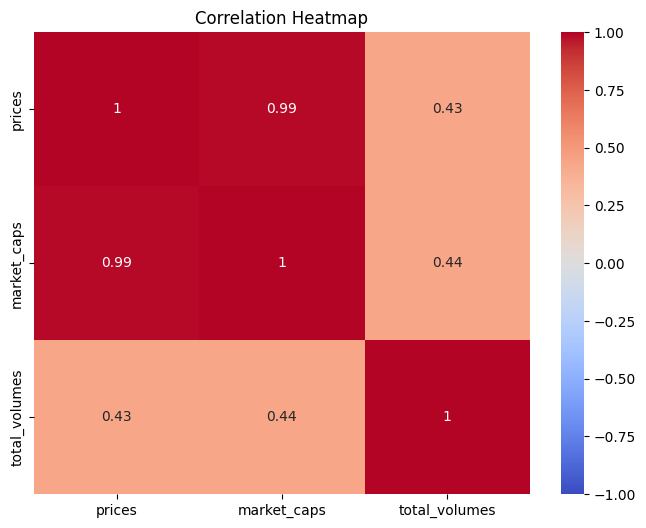

                 prices  market_caps  total_volumes
prices         1.000000     0.991102       0.433877
market_caps    0.991102     1.000000       0.436942
total_volumes  0.433877     0.436942       1.000000


In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el subconjunto de datos que contiene las columnas de interés
subset_df = projected_df[['prices', 'market_caps', 'total_volumes']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


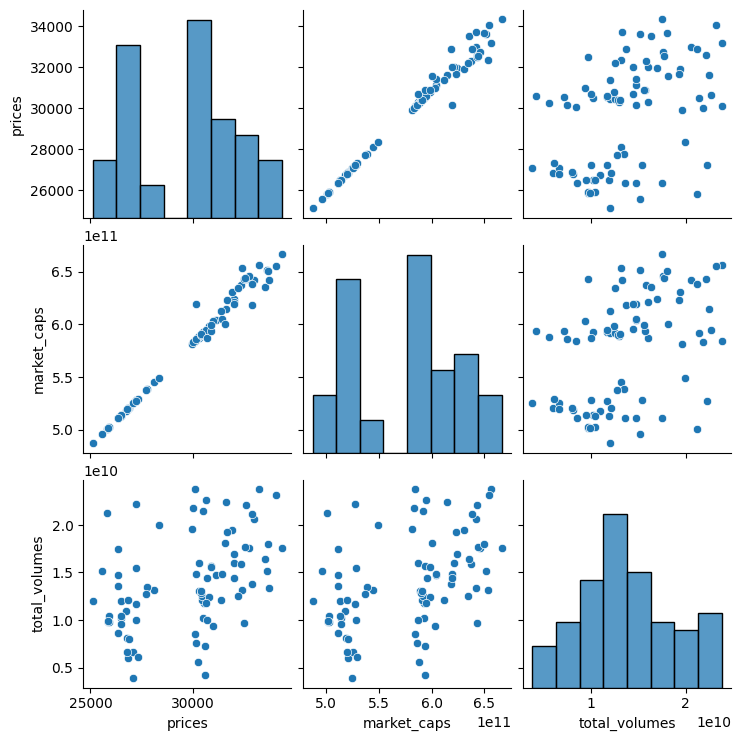

In [218]:
sns.pairplot(projected_df)

# Fundamental agregar un punto que represente hoy en el grafo de abajo

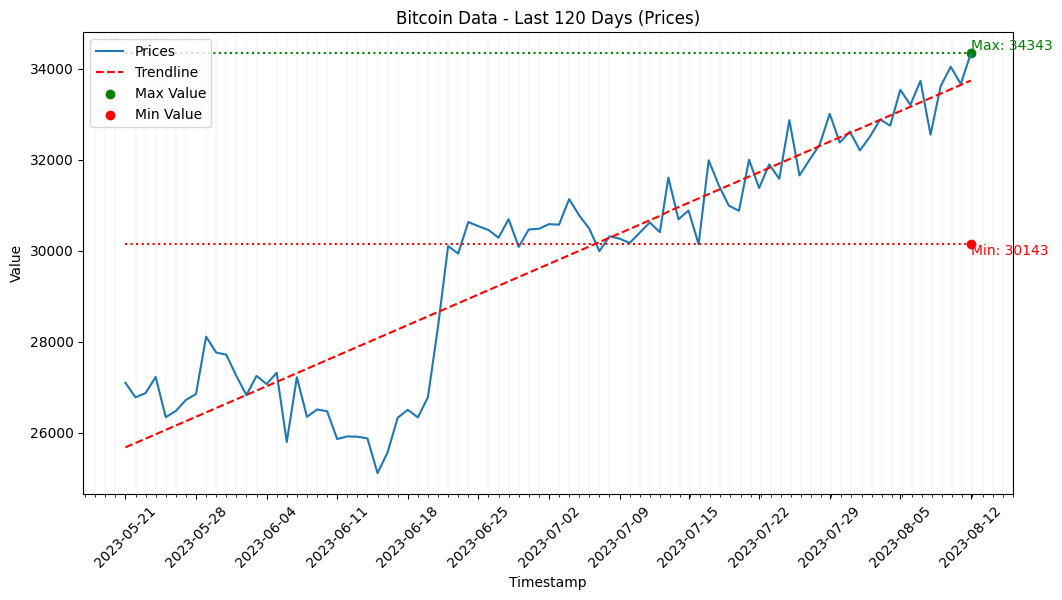

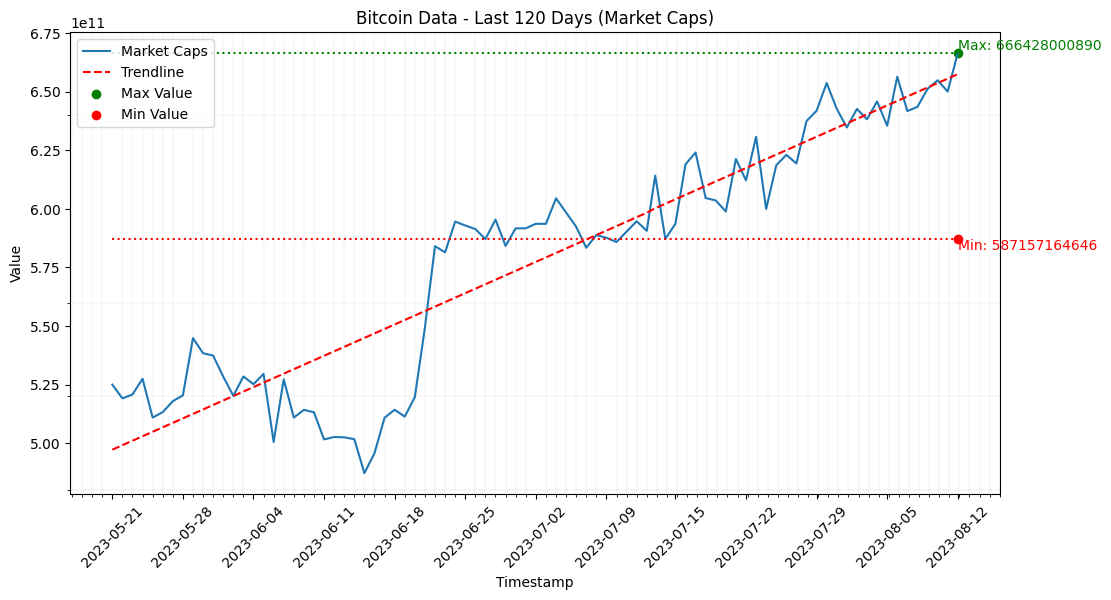

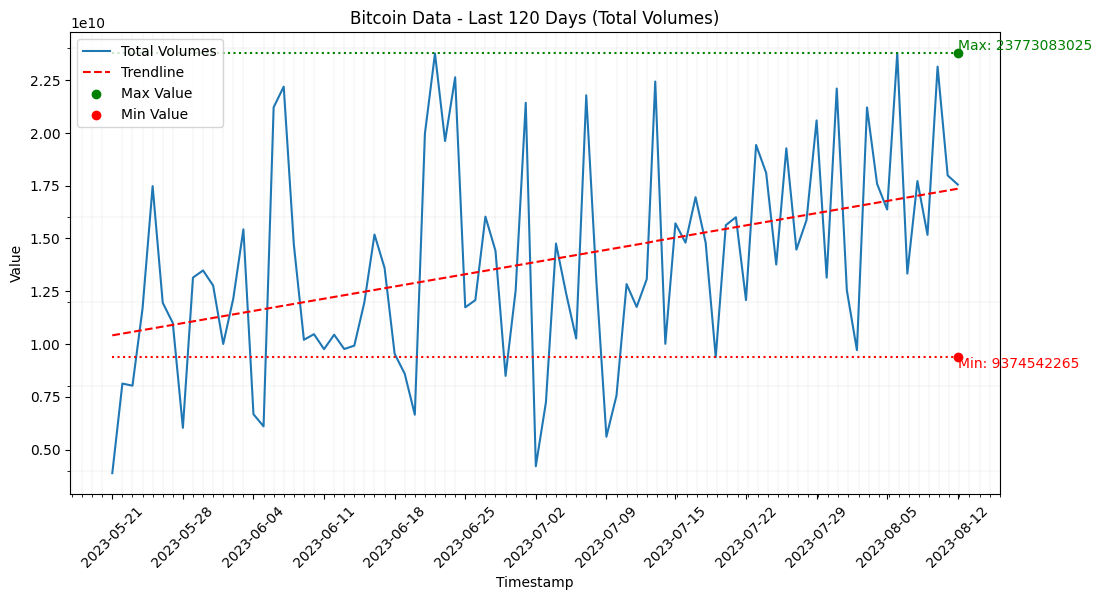

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 120 días del DataFrame
last_120_days = projected_df.tail(120)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios
ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_120_days))
coefficients = np.polyfit(x, last_120_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# Ajustar el espaciado de las marcas en el eje x
num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
step = len(last_120_days) // (num_ticks - 1)
xticks = last_120_days['timestamp'][::step]
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
last_30_days = last_120_days.tail(30)
max_value = last_30_days['prices'].max()
min_value = last_30_days['prices'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de precios
plt.show()

# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los market_caps
ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['market_caps'].max()
min_value = last_30_days['market_caps'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de market_caps
plt.show()

# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los total_volumes
ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# Ajustar el espaciado de las marcas en el eje x
ax.set_xticks(xticks)

# Obtener los máximos y mínimos de los últimos 30 días
max_value = last_30_days['total_volumes'].max()
min_value = last_30_days['total_volumes'].min()

# Marcar los máximos y mínimos en el origen
ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# Trazar líneas horizontales en los máximos y mínimos
ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Agregar líneas secundarias para mostrar los cambios diarios
ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# Mostrar el gráfico de total_volumes
plt.show()


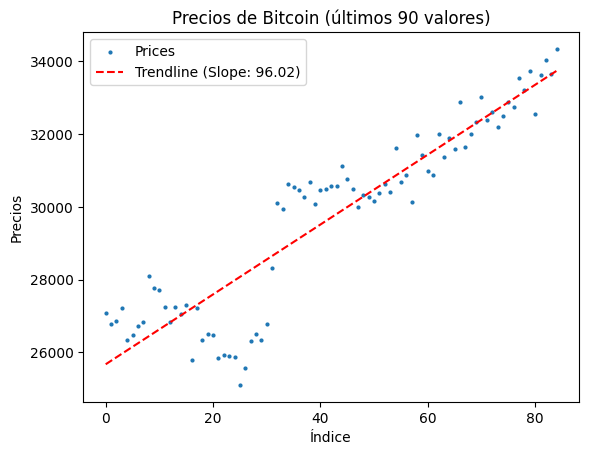

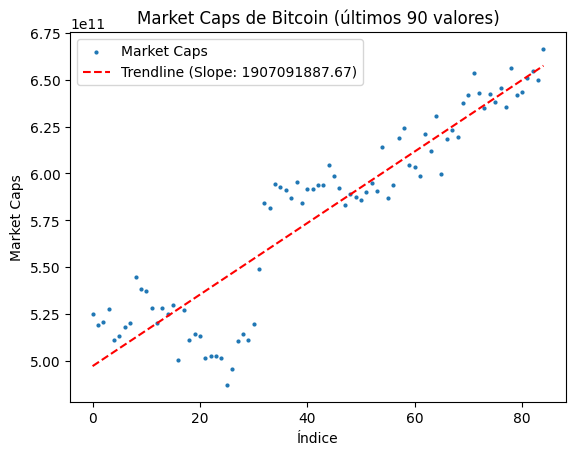

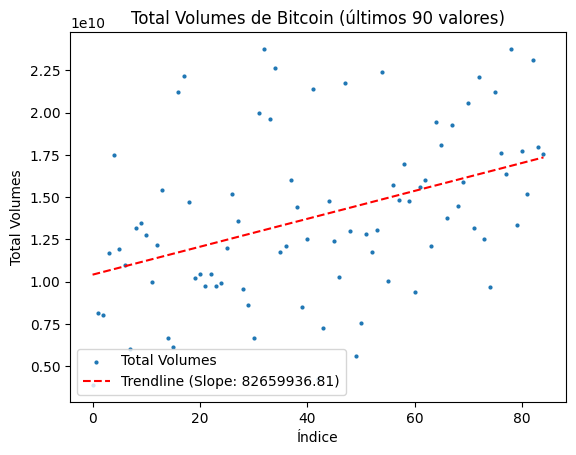

In [220]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 90 valores de los DataFrames
last_90_prices = projected_df['prices'].tail(90)
last_90_market_caps = projected_df['market_caps'].tail(90)
last_90_total_volumes = projected_df['total_volumes'].tail(90)

# Crear un rango de índices para los últimos 90 valores
indices = range(len(last_90_prices))

# Graficar los valores de precios
plt.scatter(indices, last_90_prices, s=4, label='Prices')

# Calcular la pendiente de los precios
slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
slope_prices_str = '{:.2f}'.format(slope_prices)

# Graficar la línea de tendencia de los precios
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

plt.title("Precios de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Precios")
plt.legend()
plt.show()

# Graficar los valores de market_caps
plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# Calcular la pendiente de los market_caps
slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# Graficar la línea de tendencia de los market_caps
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

plt.title("Market Caps de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Market Caps")
plt.legend()
plt.show()

# Graficar los valores de total_volumes
plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# Calcular la pendiente de los total_volumes
slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# Graficar la línea de tendencia de los total_volumes
plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
plt.xlabel("Índice")
plt.ylabel("Total Volumes")
plt.legend()
plt.show()


______________________________________________________________________________________________________________________

# Polinomical

In [221]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Definir una lista de grados de polinomio a evaluar
# degrees = [4]

# best_degree = None
# best_mse = float('inf')  # Inicializar el mejor MSE con un valor alto

# for degree in degrees:
#     # Crear características polinómicas
#     poly_features = PolynomialFeatures(degree=degree)
#     X_poly = poly_features.fit_transform(X)

#     # Crear modelos de regresión polinómica
#     model_prices_poly = LinearRegression()
#     model_market_caps_poly = LinearRegression()
#     model_total_volumes_poly = LinearRegression()

#     # Ajustar los modelos de regresión polinómica a los datos históricos
#     model_prices_poly.fit(X_poly, y_prices)
#     model_market_caps_poly.fit(X_poly, y_market_caps)
#     model_total_volumes_poly.fit(X_poly, y_total_volumes)

#     # Generar valores futuros de días para los próximos 60 días
#     future_days_poly = pd.DataFrame({'days': range(df['days'].max() + 1, df['days'].max() + 61)})
#     future_days_poly_poly = poly_features.transform(future_days_poly)

#     # Realizar predicciones de precios, market_caps y total_volumes para los próximos 60 días utilizando regresión polinómica
#     future_prices_poly = model_prices_poly.predict(future_days_poly_poly)
#     future_market_caps_poly = model_market_caps_poly.predict(future_days_poly_poly)
#     future_total_volumes_poly = model_total_volumes_poly.predict(future_days_poly_poly)

#     # Calcular el MSE para las predicciones
#     mse = mean_squared_error(df['prices'], model_prices_poly.predict(X_poly))

#     # Actualizar el grado óptimo si se encuentra un MSE más bajo
#     if mse < best_mse:
#         best_mse = mse
#         best_degree = degree

#     # Crear un DataFrame con los valores proyectados utilizando regresión polinómica
#     projected_data_poly = pd.DataFrame({
#         'timestamp': pd.date_range(start=df['timestamp'].max() + pd.DateOffset(1), periods=60, freq='D'),
#         'prices': future_prices_poly,
#         'market_caps': future_market_caps_poly,
#         'total_volumes': future_total_volumes_poly
#     })

#     # Concatenar los datos históricos y proyectados en un solo DataFrame utilizando regresión polinómica
#     projected_df_poly = pd.concat([df, projected_data_poly])

#     # Restablecer los índices
#     projected_df_poly.reset_index(drop=True, inplace=True)

#     # Mostrar el MSE para el grado actual
#     print(f"Degree {degree}: MSE = {mse}")

# # Mostrar el grado óptimo y su MSE correspondiente
# print(f"Best Degree: {best_degree}, Best MSE: {best_mse}")

# # Mostrar el DataFrame resultante utilizando regresión polinómica con el grado óptimo
# print(projected_df_poly)


In [222]:
# sns.pairplot(projected_df_poly)

In [223]:
# # Ploteamos
# x = projected_df_poly['timestamp']
# y = projected_df_poly['prices']

# plt.scatter(x, y, s=1)
# plt.title("Precios de Bitcoin")
# plt.xlabel("Timestamp")
# plt.ylabel("Precios")
# plt.show()

In [224]:
# # Ploteamos
# x = projected_df_poly['timestamp']
# y = projected_df_poly['market_caps']

# plt.scatter(x, y, s=1)
# plt.title("Capitalización de mercado de Bitcoin")
# plt.xlabel("Timestamp")
# plt.ylabel("Capitalización de mercado")
# plt.show()

In [225]:
# # Ploteamos
# x = projected_df_poly['timestamp']
# y = projected_df_poly['total_volumes']

# plt.scatter(x, y, s=1)
# plt.title("Volúmenes totales de Bitcoin")
# plt.xlabel("Timestamp")
# plt.ylabel("Volúmenes")
# plt.show()

In [226]:
# import matplotlib.pyplot as plt

# # Obtener las últimas 730 filas del DataFrame
# df_last_730 = projected_df_poly.tail(730)

# # Crear una figura y ejes para el gráfico
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los precios
# ax.plot(df_last_730['timestamp'], df_last_730['prices'], label='Prices')

# # Configurar las etiquetas y título del gráfico
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 730 Rows')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# #


In [227]:
# Opcion 2 polinomical

# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.arima.model import ARIMA

# # Agregar ruido a los datos históricos
# df_bit['prices'] += np.random.normal(0, 10, len(df_bit))
# df_bit['market_caps'] += np.random.normal(0, 1000000, len(df_bit))
# df_bit['total_volumes'] += np.random.normal(0, 1000, len(df_bit))

# # Convertir la columna 'timestamp' al formato de fecha y hora
# df_bit['timestamp'] = pd.to_datetime(df_bit['timestamp'])

# # Crear una columna numérica de días transcurridos desde la primera fecha
# df_bit['days'] = (df_bit['timestamp'] - df_bit['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = df_bit[['days']]
# y_prices = df_bit['prices']
# y_market_caps = df_bit['market_caps']
# y_total_volumes = df_bit['total_volumes']

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train_prices, y_test_prices, y_train_market_caps, y_test_market_caps, y_train_total_volumes, y_test_total_volumes = train_test_split(X, y_prices, y_market_caps, y_total_volumes, test_size=0.2, random_state=42)

# # Crear un modelo de regresión polinómica de grado 2 para cada variable
# poly_features = PolynomialFeatures(degree=2)
# X_train_poly = poly_features.fit_transform(X_train)
# X_test_poly = poly_features.transform(X_test)

# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos de entrenamiento
# model_prices.fit(X_train_poly, y_train_prices)
# model_market_caps.fit(X_train_poly, y_train_market_caps)
# model_total_volumes.fit(X_train_poly, y_train_total_volumes)

# # Realizar predicciones en los datos de prueba
# y_pred_prices = model_prices.predict(X_test_poly)
# y_pred_market_caps = model_market_caps.predict(X_test_poly)
# y_pred_total_volumes = model_total_volumes.predict(X_test_poly)

# # Calcular el error cuadrático medio en los datos de prueba
# mse_prices = mean_squared_error(y_test_prices, y_pred_prices)
# mse_market_caps = mean_squared_error(y_test_market_caps, y_pred_market_caps)
# mse_total_volumes = mean_squared_error(y_test_total_volumes, y_pred_total_volumes)

# print('MSE Prices:', mse_prices)
# print('MSE Market Caps:', mse_market_caps)
# print('MSE Total Volumes:', mse_total_volumes)

# # Modelo ARIMA
# model_arima = ARIMA(df_bit['prices'], order=(1, 1, 0))
# model_fit_arima = model_arima.fit()

# # Realizar pronósticos para los próximos n pasos
# n = 365
# forecast_arima = model_fit_arima.forecast(steps=n)

# # Imprimir los pronósticos de ARIMA
# print('ARIMA Forecast:')
# print(forecast_arima)


In [228]:
# import matplotlib.pyplot as plt

# # Obtener las últimas 730 filas del DataFrame
# df_last_730 = projected_df.tail(730)

# # Crear una figura y ejes para el gráfico
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los precios
# ax.plot(df_last_730['timestamp'], df_last_730['prices'], label='Prices')

# # Configurar las etiquetas y título del gráfico
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 730 Rows')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# #
# # Obtener los últimos 90 valores de los DataFrames
# last_90_prices = projected_df['prices'].tail(90)
# last_90_market_caps = projected_df['market_caps'].tail(90)
# last_90_total_volumes = projected_df['total_volumes'].tail(90)

# # Crear un rango de índices para los últimos 90 valores
# indices = range(len(last_90_prices))

# # Graficar los valores de precios
# plt.scatter(indices, last_90_prices, s=1)
# plt.title("Precios de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Precios")
# plt.show()

# # Graficar los valores de market_caps
# plt.scatter(indices, last_90_market_caps, s=1)
# plt.title("market_caps de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("market_caps")
# plt.show()

# # Graficar los valores de total_volumes
# plt.scatter(indices, last_90_total_volumes, s=1)
# plt.title("total_volumes de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("total_volumes")

_____________________________________________________________________________________________________________________________

# SARIMA:

In [229]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# df = df_bit
# # Convertir la columna 'timestamp' al formato de fecha y hora
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Crear una columna numérica de días transcurridos desde la primera fecha
# df['days'] = (df['timestamp'] - df['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = df[['days']]
# y_prices = df['prices']
# y_market_caps = df['market_caps']
# y_total_volumes = df['total_volumes']

# # Crear un modelo de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos históricos
# model_prices.fit(X, y_prices)
# model_market_caps.fit(X, y_market_caps)
# model_total_volumes.fit(X, y_total_volumes)

# # Generar valores futuros de días para los próximos 60 días
# future_days = pd.DataFrame({'days': range(df['days'].max() + 1, df['days'].max() + 61)})

# # Realizar predicciones de precios, market_caps y total_volumes para los próximos 60 días
# future_prices = model_prices.predict(future_days)
# future_market_caps = model_market_caps.predict(future_days)
# future_total_volumes = model_total_volumes.predict(future_days)

# # Crear un DataFrame con los valores proyectados
# projected_data = pd.DataFrame({
#     'timestamp': pd.date_range(start=df['timestamp'].max() + pd.DateOffset(1), periods=60, freq='D'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados en un solo DataFrame
# projected_df = pd.concat([df, projected_data])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# projected_df


In [230]:
# import numpy as np

# # Definir la desviación estándar del ruido
# std_dev = 200  # Ajusta este valor según tus necesidades

# # Generar el ruido siguiendo una distribución normal con media cero y la desviación estándar deseada
# noise = np.random.normal(loc=0, scale=std_dev, size=(len(projected_df), 3))

# # Agregar el ruido a todas las columnas numéricas del DataFrame
# projected_df[['prices', 'market_caps', 'total_volumes']] += noise

# # Mostrar el DataFrame resultante con el ruido agregado
# projected_df


In [231]:
# import numpy as np

# # Definir la desviación estándar del ruido para cada columna
# std_dev_prices = 200  # Ajusta este valor según tus necesidades
# std_dev_market_caps = 5000000000  # Ajusta este valor según tus necesidades
# std_dev_total_volumes = 1000000000  # Ajusta este valor según tus necesidades

# # Generar el ruido para cada columna siguiendo una distribución normal
# noise_prices = np.random.normal(loc=0, scale=std_dev_prices, size=len(projected_df))
# noise_market_caps = np.random.normal(loc=0, scale=std_dev_market_caps, size=len(projected_df))
# noise_total_volumes = np.random.normal(loc=0, scale=std_dev_total_volumes, size=len(projected_df))

# # Agregar el ruido a las columnas correspondientes del DataFrame
# projected_df['prices'] += noise_prices
# projected_df['market_caps'] += noise_market_caps
# projected_df['total_volumes'] += noise_total_volumes

# # Mostrar el DataFrame resultante con el ruido agregado
# projected_df


In [232]:
# import matplotlib.pyplot as plt

# # Obtener los últimos 90 valores de los DataFrames
# last_90_prices = projected_df['prices'].tail(90)
# last_90_market_caps = projected_df['market_caps'].tail(90)
# last_90_total_volumes = projected_df['total_volumes'].tail(90)

# # Crear un rango de índices para los últimos 90 valores
# indices = range(len(last_90_prices))

# # Graficar los valores de precios
# plt.scatter(indices, last_90_prices, s=1)
# plt.title("Precios de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Precios")
# plt.show()

# # Graficar los valores de market_caps
# plt.scatter(indices, last_90_market_caps, s=1)
# plt.title("market_caps de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("market_caps")
# plt.show()

# # Graficar los valores de total_volumes
# plt.scatter(indices, last_90_total_volumes, s=1)
# plt.title("total_volumes de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("total_volumes")
# plt.show()


In [233]:
# import matplotlib.pyplot as plt

# # Obtener las últimas 730 filas del DataFrame
# df_last_730 = projected_df.tail(730)

# # Crear una figura y ejes para el gráfico
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los precios
# ax.plot(df_last_730['timestamp'], df_last_730['prices'], label='Prices')

# # Configurar las etiquetas y título del gráfico
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 730 Rows')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

___________________________________________________________________________________________________________________________________

In [234]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Leer el DataFrame df_bit
# df = df_bit.copy()

# # Convertir la columna 'timestamp' al formato de fecha y hora
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Establecer 'timestamp' como índice del DataFrame
# df.set_index('timestamp', inplace=True)

# # Establecer la frecuencia del índice de fechas (por ejemplo, 'D' para datos diarios)
# df = df.asfreq('D')

# # Obtener la serie de tiempo de precios
# y_prices = df['prices']

# # Ajustar el modelo SARIMA
# model = SARIMAX(y_prices, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# model_fit = model.fit()

# # Generar pronóstico para los próximos 6 meses (180 días)
# forecast = model_fit.get_forecast(steps=180)

# # Obtener los valores pronosticados y los intervalos de confianza
# forecast_values = forecast.predicted_mean
# confidence_interval = forecast.conf_int()

# # Crear un DataFrame con los valores pronosticados y los intervalos de confianza
# forecast_df = pd.DataFrame({'timestamp': forecast_values.index, 'prices': forecast_values})
# forecast_df['lower_bound'] = confidence_interval.iloc[:, 0]
# forecast_df['upper_bound'] = confidence_interval.iloc[:, 1]

# # Mostrar el DataFrame con los valores pronosticados y los intervalos de confianza
# print(forecast_df)



In [235]:
# forecast_df.tail(50)

In [236]:
# import matplotlib.pyplot as plt

# # Obtener los últimos 90 valores de los DataFrames
# last_90_prices = projected_df['prices'].tail(90)
# last_90_market_caps = projected_df['market_caps'].tail(90)
# last_90_total_volumes = projected_df['total_volumes'].tail(90)

# # Crear un rango de índices para los últimos 90 valores
# indices = range(len(last_90_prices))

# # Graficar los valores de precios
# plt.scatter(indices, last_90_prices, s=1)
# plt.title("Precios de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Precios")
# plt.show()

# # Graficar los valores de market_caps
# plt.scatter(indices, last_90_market_caps, s=1)
# plt.title("market_caps de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("market_caps")
# plt.show()

# # Graficar los valores de total_volumes
# plt.scatter(indices, last_90_total_volumes, s=1)
# plt.title("total_volumes de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("total_volumes")
# plt.show()


In [237]:
# import matplotlib.pyplot as plt

# # Obtener las últimas 730 filas del DataFrame
# df_last_730 = projected_df.tail(730)

# # Crear una figura y ejes para el gráfico
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los precios
# ax.plot(df_last_730['timestamp'], df_last_730['prices'], label='Prices')

# # Configurar las etiquetas y título del gráfico
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 730 Rows')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# Logaritmica: 
## muy mala


In [238]:
#  import pandas as pd
#  from sklearn.linear_model import LinearRegression
#  import numpy as np

#  df = df_bit
#  # Convertir la columna 'timestamp' al formato de fecha y hora
#  df['timestamp'] = pd.to_datetime(df['timestamp'])

#  # Crear una columna numérica de días transcurridos desde la primera fecha
#  df['days'] = (df['timestamp'] - df['timestamp'].min()).dt.days

#  # Aplicar transformación logarítmica a los precios
#  df['log_prices'] = np.log(df['prices'])

#  # Dividir los datos en características (X) y variable objetivo (y)
#  X = df[['days']]
#  y_log_prices = df['log_prices']
#  y_market_caps = df['market_caps']
#  y_total_volumes = df['total_volumes']

#  # Crear un modelo de regresión lineal para todas las variables
#  model = LinearRegression()
#  model.fit(X, y_log_prices)

#  # Generar valores futuros de días para los próximos 60 días
#  future_days = pd.DataFrame({'days': range(df['days'].max() + 1, df['days'].max() + 61)})

#  # Realizar predicciones de los logaritmos de los precios para los próximos 60 días
#  future_log_prices = model.predict(future_days)

#  # Revertir la transformación logarítmica para obtener los precios proyectados
#  future_prices = np.exp(future_log_prices)

#  # Crear un DataFrame con los valores proyectados
#  projected_data = pd.DataFrame({
#      'timestamp': pd.date_range(start=df['timestamp'].max() + pd.DateOffset(1), periods=60, freq='D'),
#      'prices': future_prices,
#      'market_caps': model.predict(future_days),  # Utilizar el modelo para predecir market_caps
#      'total_volumes': model.predict(future_days)  # Utilizar el modelo para predecir total_volumes
#  })

#  # Concatenar los datos históricos y proyectados en un solo DataFrame
#  projected_df = pd.concat([df, projected_data])

#  # Restablecer los índices
#  projected_df.reset_index(drop=True, inplace=True)

#  # Mostrar el DataFrame resultante sin valores negativos en los precios
#  projected_df['prices'] = projected_df['prices'].clip(lower=0)

#  # Mostrar el DataFrame resultante
#  projected_df


In [239]:
projected_df.head(5)

,timestamp,prices,market_caps,total_volumes
0,2023-05-21,27093.791101,5.250400e+11,3.882362e+09
1,2023-05-22,26773.830244,5.191714e+11,8.125826e+09
2,2023-05-23,26869.686022,5.208219e+11,8.025717e+09
3,2023-05-24,27222.937747,5.275287e+11,1.168576e+10
4,2023-05-25,26338.948947,5.109880e+11,1.747720e+10


In [240]:
projected_df.tail(5)

,timestamp,prices,market_caps,total_volumes
80,2023-08-08 20:11:24,32550.075265,6.435272e+11,1.771699e+10
81,2023-08-09 20:11:24,33614.057671,6.511706e+11,1.516715e+10
82,2023-08-10 20:11:24,34044.752778,6.548462e+11,2.313579e+10
83,2023-08-11 20:11:24,33664.477402,6.500673e+11,1.798253e+10
84,2023-08-12 20:11:24,34343.313389,6.664280e+11,1.755081e+10


In [241]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Obtener el subconjunto de datos que contiene las columnas de interés
# subset_df = projected_df[['prices', 'market_caps', 'total_volumes']]

# # Calcular la matriz de correlación
# correlation_matrix = subset_df.corr()

# # Crear el heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# # Configurar el título del heatmap
# plt.title('Correlation Heatmap')

# # Mostrar el heatmap
# plt.show()
# print(correlation_matrix)

In [242]:
# sns.pairplot(projected_df)

In [243]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Obtener los últimos 120 días del DataFrame
# last_120_days = projected_df.tail(120)

# # Crear una figura y ejes para el gráfico de precios
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los precios
# ax.plot(last_120_days['timestamp'], last_120_days['prices'], label='Prices')

# # Calcular la línea de tendencia para los precios
# x = np.arange(len(last_120_days))
# coefficients = np.polyfit(x, last_120_days['prices'], 1)
# trendline = np.polyval(coefficients, x)
# ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# # Configurar las etiquetas y título del gráfico de precios
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 120 Days (Prices)')

# # Ajustar el espaciado de las marcas en el eje x
# num_ticks = 12  # Ajusta el número de marcas que deseas mostrar
# step = len(last_120_days) // (num_ticks - 1)
# xticks = last_120_days['timestamp'][::step]
# ax.set_xticks(xticks)

# # Obtener los máximos y mínimos de los últimos 30 días
# last_30_days = last_120_days.tail(30)
# max_value = last_30_days['prices'].max()
# min_value = last_30_days['prices'].min()

# # Marcar los máximos y mínimos en el origen
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# # Trazar líneas horizontales en los máximos y mínimos
# ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
# ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
# ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
# ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de precios
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios diarios
# ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de precios
# plt.show()

# # Crear una figura y ejes para el gráfico de market_caps
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los market_caps
# ax.plot(last_120_days['timestamp'], last_120_days['market_caps'], label='Market Caps')

# # Calcular la línea de tendencia para los market_caps
# coefficients = np.polyfit(x, last_120_days['market_caps'], 1)
# trendline = np.polyval(coefficients, x)
# ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# # Configurar las etiquetas y título del gráfico de market_caps
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 120 Days (Market Caps)')

# # Ajustar el espaciado de las marcas en el eje x
# ax.set_xticks(xticks)

# # Obtener los máximos y mínimos de los últimos 30 días
# max_value = last_30_days['market_caps'].max()
# min_value = last_30_days['market_caps'].min()

# # Marcar los máximos y mínimos en el origen
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# # Trazar líneas horizontales en los máximos y mínimos
# ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
# ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
# ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
# ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de market_caps
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios diarios
# ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de market_caps
# plt.show()

# # Crear una figura y ejes para el gráfico de total_volumes
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los total_volumes
# ax.plot(last_120_days['timestamp'], last_120_days['total_volumes'], label='Total Volumes')

# # Calcular la línea de tendencia para los total_volumes
# coefficients = np.polyfit(x, last_120_days['total_volumes'], 1)
# trendline = np.polyval(coefficients, x)
# ax.plot(last_120_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')
# # Configurar las etiquetas y título del gráfico de total_volumes
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 120 Days (Total Volumes)')

# # Ajustar el espaciado de las marcas en el eje x
# ax.set_xticks(xticks)

# # Obtener los máximos y mínimos de los últimos 30 días
# max_value = last_30_days['total_volumes'].max()
# min_value = last_30_days['total_volumes'].min()

# # Marcar los máximos y mínimos en el origen
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [max_value], color='green', label='Max Value')
# ax.scatter([last_120_days['timestamp'].iloc[-1]], [min_value], color='red', label='Min Value')

# # Trazar líneas horizontales en los máximos y mínimos
# ax.hlines(max_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='green', linestyle='dotted')
# ax.hlines(min_value, last_120_days['timestamp'].iloc[0], last_120_days['timestamp'].iloc[-1], colors='red', linestyle='dotted')

# # Mostrar los valores de los máximos y mínimos (redondeados a 0 decimales)
# ax.text(last_120_days['timestamp'].iloc[-1], max_value, f"Max: {max_value:.0f}", color='green', ha='left', va='bottom')
# ax.text(last_120_days['timestamp'].iloc[-1], min_value, f"Min: {min_value:.0f}", color='red', ha='left', va='top')

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de total_volumes
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios diarios
# ax.xaxis.set_minor_locator(plt.MultipleLocator(base=1))  # Mostrar todas las marcas
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de total_volumes
# plt.show()


In [244]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Obtener los últimos 90 valores de los DataFrames
# last_90_prices = projected_df['prices'].tail(90)
# last_90_market_caps = projected_df['market_caps'].tail(90)
# last_90_total_volumes = projected_df['total_volumes'].tail(90)

# # Crear un rango de índices para los últimos 90 valores
# indices = range(len(last_90_prices))

# # Graficar los valores de precios
# plt.scatter(indices, last_90_prices, s=4, label='Prices')

# # Calcular la pendiente de los precios
# slope_prices, _ = np.polyfit(indices, last_90_prices, 1)
# slope_prices_str = '{:.2f}'.format(slope_prices)

# # Graficar la línea de tendencia de los precios
# plt.plot(indices, np.polyval(np.polyfit(indices, last_90_prices, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_prices_str + ')')

# plt.title("Precios de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Precios")
# plt.legend()
# plt.show()

# # Graficar los valores de market_caps
# plt.scatter(indices, last_90_market_caps, s=4, label='Market Caps')

# # Calcular la pendiente de los market_caps
# slope_market_caps, _ = np.polyfit(indices, last_90_market_caps, 1)
# slope_market_caps_str = '{:.2f}'.format(slope_market_caps)

# # Graficar la línea de tendencia de los market_caps
# plt.plot(indices, np.polyval(np.polyfit(indices, last_90_market_caps, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_market_caps_str + ')')

# plt.title("Market Caps de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Market Caps")
# plt.legend()
# plt.show()

# # Graficar los valores de total_volumes
# plt.scatter(indices, last_90_total_volumes, s=4, label='Total Volumes')

# # Calcular la pendiente de los total_volumes
# slope_total_volumes, _ = np.polyfit(indices, last_90_total_volumes, 1)
# slope_total_volumes_str = '{:.2f}'.format(slope_total_volumes)

# # Graficar la línea de tendencia de los total_volumes
# plt.plot(indices, np.polyval(np.polyfit(indices, last_90_total_volumes, 1), indices), linestyle='--', color='red', label='Trendline (Slope: ' + slope_total_volumes_str + ')')

# plt.title("Total Volumes de Bitcoin (últimos 90 valores)")
# plt.xlabel("Índice")
# plt.ylabel("Total Volumes")
# plt.legend()
# plt.show()


_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Ahora por hora - BTC:

In [245]:
import pandas as pd
import requests

bitcoin_url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&interval=hourly&precision=full"
bitcoin_response = requests.get(bitcoin_url)
bitcoin_data = bitcoin_response.json()

# Extraer los valores de timestamp de cada lista en la columna 'timestamp'
timestamps = [item[0] for item in bitcoin_data['prices']]

# Crear el dataframe con los datos históricos de Bitcoin
df_bit_h = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='ms'),
    'prices': [item[1] for item in bitcoin_data['prices']],
    'market_caps': [item[1] for item in bitcoin_data['market_caps']],
    'total_volumes': [item[1] for item in bitcoin_data['total_volumes']]
})

# Mostrar las últimas 50 filas del dataframe
print(df_bit_h.head(50))
print(df_bit_h.tail(50))

                 timestamp        prices   market_caps  total_volumes
0  2023-04-15 03:00:06.870  30395.958542  5.884025e+11   1.911575e+10
1  2023-04-15 04:01:03.388  30415.867992  5.884532e+11   1.879759e+10
2  2023-04-15 05:00:45.641  30406.197273  5.881977e+11   1.862578e+10
3  2023-04-15 06:00:20.330  30445.449926  5.890317e+11   1.822572e+10
4  2023-04-15 07:00:13.575  30420.812283  5.884133e+11   1.786772e+10
5  2023-04-15 08:00:32.261  30455.131589  5.892971e+11   1.729956e+10
6  2023-04-15 09:01:53.353  30422.112026  5.885141e+11   1.684590e+10
7  2023-04-15 10:00:51.385  30486.486567  5.895583e+11   1.662161e+10
8  2023-04-15 11:00:51.777  30452.749194  5.892943e+11   1.626608e+10
9  2023-04-15 12:00:40.168  30433.557984  5.888328e+11   1.636518e+10
10 2023-04-15 13:01:13.138  30477.740747  5.897137e+11   1.595349e+10
11 2023-04-15 14:01:27.428  30403.769529  5.886653e+11   1.539549e+10
12 2023-04-15 15:00:36.908  30434.500311  5.889331e+11   1.474021e+10
13 2023-04-15 16:00:

In [246]:
df_bit_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      2161 non-null   datetime64[ns]
 1   prices         2161 non-null   float64       
 2   market_caps    2161 non-null   float64       
 3   total_volumes  2161 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 67.7 KB


In [247]:
df_bit_h.isnull().sum()

timestamp        0
prices           0
market_caps      0
total_volumes    0
dtype: int64

In [248]:
df_bit_h.drop_duplicates()

,timestamp,prices,market_caps,total_volumes
0,2023-04-15 03:00:06.870,30395.958542,5.884025e+11,1.911575e+10
1,2023-04-15 04:01:03.388,30415.867992,5.884532e+11,1.879759e+10
2,2023-04-15 05:00:45.641,30406.197273,5.881977e+11,1.862578e+10
3,2023-04-15 06:00:20.330,30445.449926,5.890317e+11,1.822572e+10
4,2023-04-15 07:00:13.575,30420.812283,5.884133e+11,1.786772e+10
...,...,...,...,...
2156,2023-07-13 23:00:56.318,31317.972186,6.087006e+11,2.176866e+10
2157,2023-07-14 00:01:26.868,31446.014971,6.107255e+11,2.125427e+10
2158,2023-07-14 01:00:12.170,31430.542251,6.118213e+11,2.479991e+10
2159,2023-07-14 02:00:39.473,31408.628618,6.102387e+11,2.372901e+10


In [249]:
df_bit_h = df_bit.dropna()

In [250]:
df_bit_h.describe()

,timestamp,prices,market_caps,total_volumes
count,3727,3727.000000,3.727000e+03,3.727000e+03
mean,2018-06-06 10:25:50.815223040,11860.648688,2.202521e+11,1.413860e+10
min,2013-04-28 00:00:00,67.809000,7.713681e+08,0.000000e+00
25%,2015-11-17 12:00:00,567.225000,7.302328e+09,1.302747e+08
50%,2018-06-07 00:00:00,6312.877243,1.089040e+11,3.522949e+09
75%,2020-12-24 12:00:00,17077.415328,3.242881e+11,2.433420e+10
max,2023-07-13 20:11:24,67617.015545,1.278798e+12,1.788941e+11
std,NaN,15580.295793,2.952222e+11,1.845325e+10


# Grafico Inputs hora - BTC:

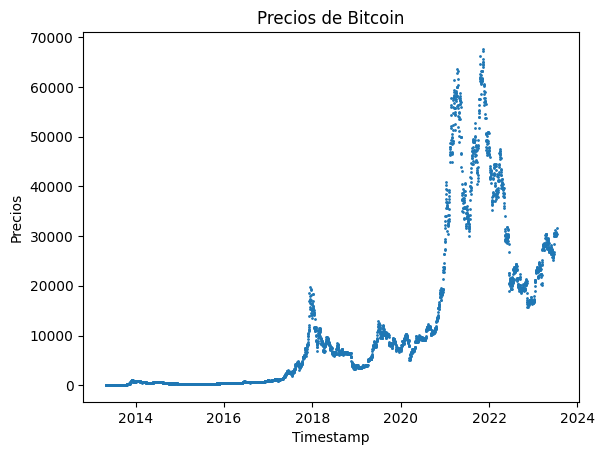

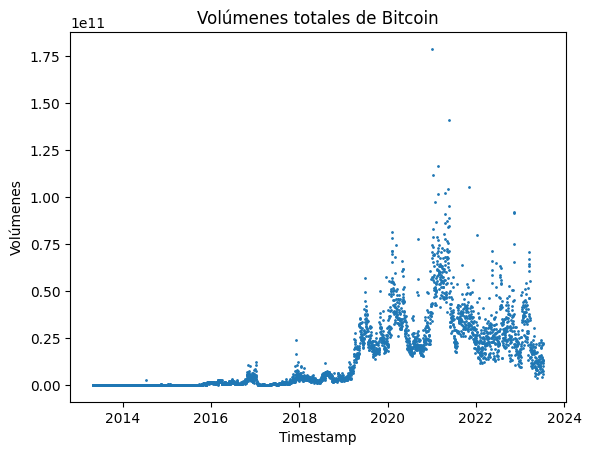

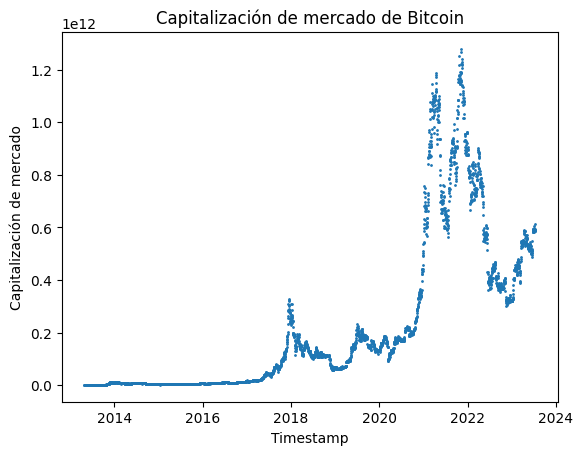

In [251]:
# Grafico los inputs
import pandas as pd
import matplotlib.pyplot as plt

# Ploteamos
x = df_bit_h['timestamp']
y = df_bit_h['prices']

plt.scatter(x, y, s=1)
plt.title("Precios de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Precios")
plt.show()
# Ploteamos
x = df_bit['timestamp']
y = df_bit['total_volumes']

plt.scatter(x, y, s=1)
plt.title("Volúmenes totales de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Volúmenes")
plt.show()
# Ploteamos
x = df_bit['timestamp']
y = df_bit['market_caps']

plt.scatter(x, y, s=1)
plt.title("Capitalización de mercado de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Capitalización de mercado")
plt.show()

In [252]:
df_bit_h_t = df_bit_h.T

In [253]:
df_bit_h_t

,0,1,2,3,4,5,6,7,8,9,...,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727
timestamp,2013-04-28 00:00:00,2013-04-29 00:00:00,2013-04-30 00:00:00,2013-05-01 00:00:00,2013-05-02 00:00:00,2013-05-03 00:00:00,2013-05-04 00:00:00,2013-05-05 00:00:00,2013-05-06 00:00:00,2013-05-07 00:00:00,...,2023-07-05 00:00:00,2023-07-06 00:00:00,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-13 20:11:24
prices,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,30775.624022,30484.793774,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31607.694333
market_caps,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,598449423994.125244,592386606697.315308,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,614196763744.541382
total_volumes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12403890725.264545,10260132141.46154,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,22431017887.201172


# Preparacion del dataframe para modelo de Regresion lineal:

In [254]:
# Almacenar los índices en una variable
indices = df_bit_h_t.index

In [255]:
# Almacenar los nombres de las filas en una variable
df_bit_h_t_row_names = df_bit_h_t.index

# Eliminar los nombres de las filas del índice del DataFrame
df_bit_h_t.reset_index(drop=True, inplace=True)

# Imprimir los nombres de las filas
print(df_bit_h_t_row_names)

Index(['timestamp', 'prices', 'market_caps', 'total_volumes'], dtype='object')


In [256]:
df_bit_h_t

,0,1,2,3,4,5,6,7,8,9,...,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727
0,2013-04-28 00:00:00,2013-04-29 00:00:00,2013-04-30 00:00:00,2013-05-01 00:00:00,2013-05-02 00:00:00,2013-05-03 00:00:00,2013-05-04 00:00:00,2013-05-05 00:00:00,2013-05-06 00:00:00,2013-05-07 00:00:00,...,2023-07-05 00:00:00,2023-07-06 00:00:00,2023-07-07 00:00:00,2023-07-08 00:00:00,2023-07-09 00:00:00,2023-07-10 00:00:00,2023-07-11 00:00:00,2023-07-12 00:00:00,2023-07-13 00:00:00,2023-07-13 20:11:24
1,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,30775.624022,30484.793774,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31607.694333
2,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,598449423994.125244,592386606697.315308,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,614196763744.541382
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12403890725.264545,10260132141.46154,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,22431017887.201172


In [257]:
# Almacenar la primera fila en una variable
primera_fila = df_bit_h_t.iloc[0]

# Eliminar la primera fila del DataFrame
df_bit_h_t = df_bit_h_t.iloc[1:]

print(primera_fila)

0       2013-04-28 00:00:00
1       2013-04-29 00:00:00
2       2013-04-30 00:00:00
3       2013-05-01 00:00:00
4       2013-05-02 00:00:00
               ...         
3723    2023-07-10 00:00:00
3724    2023-07-11 00:00:00
3725    2023-07-12 00:00:00
3726    2023-07-13 00:00:00
3727    2023-07-13 20:11:24
Name: 0, Length: 3727, dtype: object


In [258]:
df_bit_t

,0,1,2,3,4,5,6,7,8,9,...,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727
1,135.3,141.96,135.3,117.0,103.43,91.01,111.25,116.79,118.33,106.4,...,30775.624022,30484.793774,29990.055151,30315.265402,30264.197345,30169.870657,30394.281146,30620.814247,30407.416314,31607.694333
2,1500517590.0,1575032004.0,1501657493.0,1298951550.0,1148667722.0,1011066494.0,1236351844.0,1298377788.0,1315992304.0,1183766500.0,...,598449423994.125244,592386606697.315308,583429029204.245117,588811434763.891235,587678367157.986694,585883986681.171143,590311894648.751831,594749192359.135132,590629381260.711426,614196763744.541382
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12403890725.264545,10260132141.46154,21776707863.503353,13018507892.814608,5608541981.756295,7559670230.189486,12835219756.965891,11753418050.421658,13072555444.262321,22431017887.201172


____________________________________________________________________________________________________________________________________________________

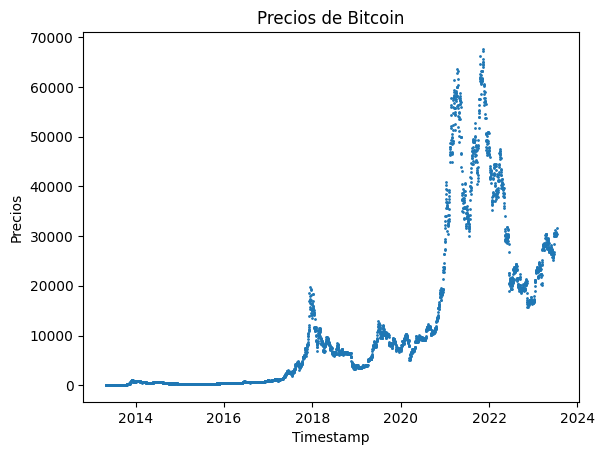

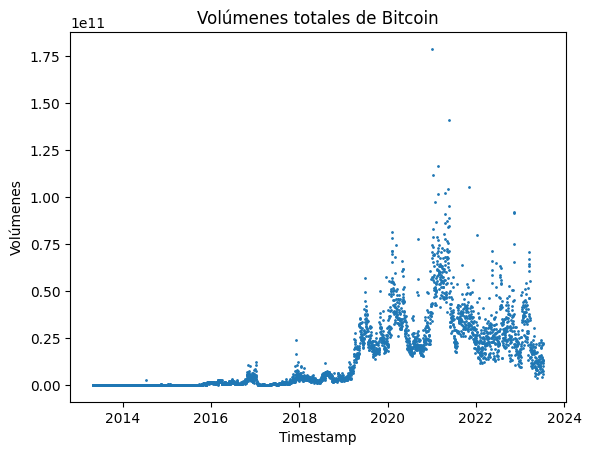

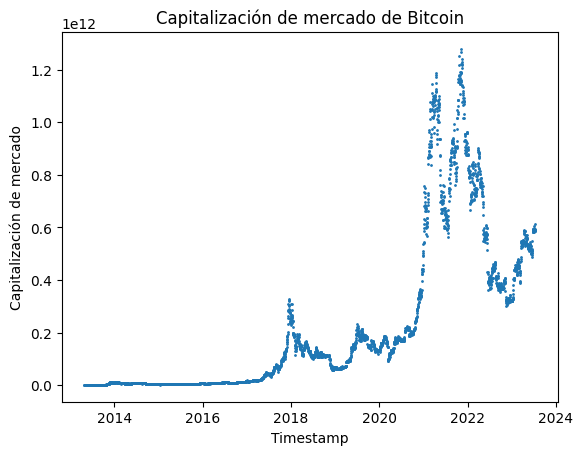

In [259]:
# Grafico los inputs
import pandas as pd
import matplotlib.pyplot as plt

# Ploteamos
x = df_bit_h['timestamp']
y = df_bit_h['prices']

plt.scatter(x, y, s=1)
plt.title("Precios de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Precios")
plt.show()
# Ploteamos
x = df_bit['timestamp']
y = df_bit['total_volumes']

plt.scatter(x, y, s=1)
plt.title("Volúmenes totales de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Volúmenes")
plt.show()
# Ploteamos
x = df_bit['timestamp']
y = df_bit['market_caps']

plt.scatter(x, y, s=1)
plt.title("Capitalización de mercado de Bitcoin")
plt.xlabel("Timestamp")
plt.ylabel("Capitalización de mercado")
plt.show()

# 1er modelo ML - EN REVISION!

In [260]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [261]:
# # Opcion 1 - Sobre ajustado 
 
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Filtrar los últimos 5 días
# last_5_days = df_bit_h[-(10*24):].copy()

# # Convertir la columna 'timestamp' al formato de fecha y hora
# last_5_days['timestamp'] = pd.to_datetime(last_5_days['timestamp'])

# # Crear una columna numérica de horas transcurridas desde la primera fecha de los últimos 5 días
# last_5_days['hours'] = (last_5_days['timestamp'] - last_5_days['timestamp'].min()).dt.total_seconds() / 3600

# # Dividir los datos en características (X) y variable objetivo (y)
# X = last_5_days[['hours']]
# y_prices = last_5_days['prices']
# y_market_caps = last_5_days['market_caps']
# y_total_volumes = last_5_days['total_volumes']

# # Crear un modelo de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos de los últimos 5 días
# model_prices.fit(X, y_prices)
# model_market_caps.fit(X, y_market_caps)
# model_total_volumes.fit(X, y_total_volumes)

# # Generar valores futuros de horas para los próximos 3 días
# future_hours = pd.DataFrame({'hours': np.arange(last_5_days['hours'].max() + 1, last_5_days['hours'].max() + 3)})

# # Realizar predicciones de precios, market_caps y total_volumes para los próximos 3 días
# future_prices = model_prices.predict(future_hours)
# future_market_caps = model_market_caps.predict(future_hours)
# future_total_volumes = model_total_volumes.predict(future_hours)

# # Calcular desviaciones estándar para cada variable
# std_prices = last_5_days['prices'].std()
# std_market_caps = last_5_days['market_caps'].std()
# std_total_volumes = last_5_days['total_volumes'].std()

# # Generar ruido gaussiano para cada variable
# noise_prices = np.random.normal(0, std_prices, len(future_prices))
# noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
# noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# # Agregar ruido a los valores pronosticados
# future_prices += noise_prices
# future_market_caps += noise_market_caps
# future_total_volumes += noise_total_volumes

# # Crear un DataFrame con los valores proyectados y con ruido
# projected_data_with_noise = pd.DataFrame({
#     'timestamp': pd.to_datetime(last_5_days['timestamp'].max()) + pd.to_timedelta(future_hours['hours'], unit='h'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
# projected_df = pd.concat([last_5_days, projected_data_with_noise])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)


In [262]:
# # Opcion 2:
# import pandas as pd
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Filtrar los últimos 3 días
# last_45_days = df_bit_h[(-3*24):].copy()

# # Convertir la columna 'timestamp' al formato de fecha y hora
# last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# # Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 3 días ( 3*24 registros, [ 1/h ] ).
# last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = last_45_days[['days']]
# y_prices = last_45_days['prices']
# y_market_caps = last_45_days['market_caps']
# y_total_volumes = last_45_days['total_volumes']

# # Crear un modelo de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos de los últimos 45 días
# model_prices.fit(X, y_prices)
# model_market_caps.fit(X, y_market_caps)
# model_total_volumes.fit(X, y_total_volumes)

# # Generar valores futuros de días para los próximos 20 días
# future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 20 + 1)})

# # Realizar predicciones de precios, market_caps y total_volumes para los próximos 20 días
# future_prices = model_prices.predict(future_days)
# future_market_caps = model_market_caps.predict(future_days)
# future_total_volumes = model_total_volumes.predict(future_days)

# # Calcular desviaciones estándar para cada variable y reducir en un 80%
# std_prices = np.std(last_45_days['prices']) * 0.25
# std_market_caps = np.std(last_45_days['market_caps']) * 0.30
# std_total_volumes = np.std(last_45_days['total_volumes']) * 0.6

# # Generar ruido gaussiano para cada variable con la desviación estándar reducida
# noise_prices = np.random.normal(0, std_prices, len(future_prices))
# noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
# noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# # Agregar ruido a los valores pronosticados
# future_prices += noise_prices
# future_market_caps += noise_market_caps
# future_total_volumes += noise_total_volumes

# # Crear un DataFrame con los valores proyectados y con ruido
# projected_data_with_noise = pd.DataFrame({
#     'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(days=1), periods=20, freq='H'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
# projected_df = pd.concat([last_45_days, projected_data_with_noise])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)


In [263]:
# # opcion 3:

# # Opcion 2: -
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Filtrar los últimos 45 días
# last_45_days = df_bit[-55:].copy()

# # Convertir la columna 'timestamp' al formato de fecha y hora
# last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# # Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
# last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = last_45_days[['days']]
# y_prices = last_45_days['prices']
# y_market_caps = last_45_days['market_caps']
# y_total_volumes = last_45_days['total_volumes']

# # Crear un modelo de regresión lineal para cada variable
# model_prices = LinearRegression()
# model_market_caps = LinearRegression()
# model_total_volumes = LinearRegression()

# # Ajustar los modelos a los datos de los últimos 45 días
# model_prices.fit(X, y_prices)
# model_market_caps.fit(X, y_market_caps)
# model_total_volumes.fit(X, y_total_volumes)

# # Generar valores futuros de días para los próximos 30 días
# future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 31)})

# # Realizar predicciones de precios, market_caps y total_volumes para los próximos 30 días
# future_prices = model_prices.predict(future_days)
# future_market_caps = model_market_caps.predict(future_days)
# future_total_volumes = model_total_volumes.predict(future_days)

# # Calcular desviaciones estándar para cada variable
# std_prices = 2229.815617/5
# std_market_caps = 4.379837e+10/5
# std_total_volumes = 3.940256e+09

# # Generar ruido gaussiano para cada variable
# noise_prices = np.random.normal(0, std_prices, len(future_prices))
# noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
# noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# # Agregar ruido a los valores pronosticados
# future_prices += noise_prices
# future_market_caps += noise_market_caps
# future_total_volumes += noise_total_volumes

# # Crear un DataFrame con los valores proyectados y con ruido
# projected_data_with_noise = pd.DataFrame({
#     'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(1), periods=30, freq='D'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
# projected_df = pd.concat([last_45_days, projected_data_with_noise])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)

In [264]:
# # Opcion 4: Ridge

# import pandas as pd
# import numpy as np
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score

# # Filtrar los últimos 45 días
# last_45_days = df_bit_h[-45:].copy()

# # Convertir la columna 'timestamp' al formato de fecha y hora
# last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# # Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 45 días
# last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# # Dividir los datos en características (X) y variable objetivo (y)
# X = last_45_days[['days']]
# y_prices = last_45_days['prices']
# y_market_caps = last_45_days['market_caps']
# y_total_volumes = last_45_days['total_volumes']

# # Crear un modelo de regresión lineal ridge para cada variable
# model_prices = Ridge(alpha=0.5)
# model_market_caps = Ridge(alpha=0.5)
# model_total_volumes = Ridge(alpha=0.5)

# # Ajustar los modelos a los datos de los últimos 45 días
# model_prices.fit(X, y_prices)
# model_market_caps.fit(X, y_market_caps)
# model_total_volumes.fit(X, y_total_volumes)

# # Generar valores futuros de días para los próximos 20 días (cada día tiene 24 registros por hora)
# future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 21)})

# # Realizar predicciones de precios, market_caps y total_volumes para los próximos 20 días (cada día tiene 24 registros por hora)
# future_prices = model_prices.predict(future_days)
# future_market_caps = model_market_caps.predict(future_days)
# future_total_volumes = model_total_volumes.predict(future_days)

# # Calcular desviaciones estándar para cada variable y reducir en un 80%
# std_prices = np.std(last_45_days['prices']) * 0.2
# std_market_caps = np.std(last_45_days['market_caps']) * 0.4
# std_total_volumes = np.std(last_45_days['total_volumes']) * 0.4

# # Generar ruido gaussiano para cada variable con la desviación estándar reducida
# noise_prices = np.random.normal(0, std_prices, len(future_prices))
# noise_market_caps = np.random.normal(0, std_market_caps, len(future_market_caps))
# noise_total_volumes = np.random.normal(0, std_total_volumes, len(future_total_volumes))

# # Agregar ruido a los valores pronosticados
# future_prices += noise_prices
# future_market_caps += noise_market_caps
# future_total_volumes += noise_total_volumes

# # Crear un DataFrame con los valores proyectados y con ruido
# projected_data_with_noise = pd.DataFrame({
#     'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(hours=1), periods=20 * 24, freq='H'),
#     'prices': future_prices,
#     'market_caps': future_market_caps,
#     'total_volumes': future_total_volumes
# })

# # Concatenar los datos históricos y proyectados con ruido en un solo DataFrame
# projected_df = pd.concat([last_45_days, projected_data_with_noise])

# # Restablecer los índices
# projected_df.reset_index(drop=True, inplace=True)

# # Mostrar el DataFrame resultante
# print(projected_df)

# # Evaluar el rendimiento del modelo
# print("Model Performance:")
# print("Prices - MSE:", mean_squared_error(y_prices, model_prices.predict(X)))
# print("Prices - R2:", r2_score(y_prices, model_prices.predict(X)))
# print("Market Caps - MSE:", mean_squared_error(y_market_caps, model_market_caps.predict(X)))
# print("Market Caps - R2:", r2_score(y_market_caps, model_market_caps.predict(X)))
# print("Total Volumes - MSE:", mean_squared_error(y_total_volumes, model_total_volumes.predict(X)))
# print("Total Volumes - R2:", r2_score(y_total_volumes, model_total_volumes.predict(X)))


In [265]:
# Opcion 5: - Regresion multiple: Aún no funciona, sigo implementando...
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Filtrar los últimos 3 días
last_45_days = df_bit_h[(-30*24):].copy()

# Convertir la columna 'timestamp' al formato de fecha y hora
last_45_days['timestamp'] = pd.to_datetime(last_45_days['timestamp'])

# Crear una columna numérica de días transcurridos desde la primera fecha de los últimos 3 días (3 * 24 registros, [1/h]).
last_45_days['days'] = (last_45_days['timestamp'] - last_45_days['timestamp'].min()).dt.days

# Dividir los datos en características (X) y variable objetivo (y)
X_prices = last_45_days[['days', 'market_caps', 'total_volumes']]
y_prices = last_45_days['prices']

X_market_caps = last_45_days[['days', 'prices', 'total_volumes']]
y_market_caps = last_45_days['market_caps']

X_total_volumes = last_45_days[['days', 'prices', 'market_caps']]
y_total_volumes = last_45_days['total_volumes']

# Crear modelos de regresión lineal para cada variable
model_prices = LinearRegression()
model_market_caps = LinearRegression()
model_total_volumes = LinearRegression()

# Ajustar los modelos a los datos de los últimos 45 días
model_prices.fit(X_prices, y_prices)
model_market_caps.fit(X_market_caps, y_market_caps)
model_total_volumes.fit(X_total_volumes, y_total_volumes)

# Generar valores futuros de días para los próximos 20 días
future_days = pd.DataFrame({'days': range(last_45_days['days'].max() + 1, last_45_days['days'].max() + 20 + 1)})

# Crear un DataFrame con las características X para los próximos 20 días
future_X_prices = future_days.copy()
future_X_prices['market_caps'] = 0
future_X_prices['total_volumes'] = 0

future_X_market_caps = future_days.copy()
future_X_market_caps['prices'] = 0
future_X_market_caps['total_volumes'] = 0

future_X_total_volumes = future_days.copy()
future_X_total_volumes['prices'] = 0
future_X_total_volumes['market_caps'] = 0

# Realizar predicciones de precios, market_caps y total_volumes para los próximos 20 días
for i, row in future_X_prices.iterrows():
    future_X_prices.loc[i, 'market_caps'] = model_market_caps.predict([[row['days'], 0, 0]])
    future_X_prices.loc[i, 'total_volumes'] = model_total_volumes.predict([[row['days'], 0, future_X_prices.loc[i, 'market_caps']]])

for i, row in future_X_market_caps.iterrows():
    future_X_market_caps.loc[i, 'prices'] = model_prices.predict([[row['days'], 0, 0]])
    future_X_market_caps.loc[i, 'total_volumes'] = model_total_volumes.predict([[row['days'], future_X_market_caps.loc[i, 'prices'], 0]])

for i, row in future_X_total_volumes.iterrows():
    future_X_total_volumes.loc[i, 'prices'] = model_prices.predict([[row['days'], future_X_total_volumes.loc[i, 'market_caps'], 0]])
    future_X_total_volumes.loc[i, 'market_caps'] = model_market_caps.predict([[row['days'], future_X_total_volumes.loc[i, 'prices'], 0]])

# Realizar predicciones de precios, market_caps y total_volumes para los próximos 20 días
future_prices = model_prices.predict(future_X_prices[['days', 'market_caps', 'total_volumes']])
future_market_caps = model_market_caps.predict(future_X_market_caps[['days', 'prices', 'total_volumes']])
future_total_volumes = model_total_volumes.predict(future_X_total_volumes[['days', 'prices', 'market_caps']])

# Crear un DataFrame con los valores proyectados
projected_data = pd.DataFrame({
    'timestamp': pd.date_range(start=last_45_days['timestamp'].max() + pd.DateOffset(days=1), periods=20, freq='H'),
    'prices': future_prices,
    'market_caps': future_market_caps,
    'total_volumes': future_total_volumes
})

# Mostrar el DataFrame resultante
print(projected_data)


             timestamp     prices   market_caps  total_volumes
0  2023-07-14 20:11:24  31.537091 -5.238688e+08   2.326077e+10
1  2023-07-14 21:11:24  31.495584 -5.233009e+08   2.323302e+10
2  2023-07-14 22:11:24  31.454076 -5.227330e+08   2.320528e+10
3  2023-07-14 23:11:24  31.412569 -5.221651e+08   2.317753e+10
4  2023-07-15 00:11:24  31.371062 -5.215972e+08   2.314979e+10
5  2023-07-15 01:11:24  31.329554 -5.210293e+08   2.312204e+10
6  2023-07-15 02:11:24  31.288047 -5.204614e+08   2.309430e+10
7  2023-07-15 03:11:24  31.246540 -5.198935e+08   2.306655e+10
8  2023-07-15 04:11:24  31.205032 -5.193256e+08   2.303880e+10
9  2023-07-15 05:11:24  31.163525 -5.187577e+08   2.301106e+10
10 2023-07-15 06:11:24  31.122017 -5.181898e+08   2.298331e+10
11 2023-07-15 07:11:24  31.080510 -5.176219e+08   2.295557e+10
12 2023-07-15 08:11:24  31.039003 -5.170540e+08   2.292782e+10
13 2023-07-15 09:11:24  30.997495 -5.164861e+08   2.290008e+10
14 2023-07-15 10:11:24  30.955988 -5.159182e+08   2.287

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

In [266]:
projected_df = projected_data

In [267]:
projected_df.describe()

,timestamp,prices,market_caps,total_volumes
count,20,20.000000,2.000000e+01,2.000000e+01
mean,2023-07-15 05:41:24.000000512,31.142771,-5.184738e+08,2.299719e+10
min,2023-07-14 20:11:24,30.748451,-5.238688e+08,2.273360e+10
25%,2023-07-15 00:56:24,30.945611,-5.211713e+08,2.286540e+10
50%,2023-07-15 05:41:24,31.142771,-5.184738e+08,2.299719e+10
75%,2023-07-15 10:26:24,31.339931,-5.157762e+08,2.312898e+10
max,2023-07-15 15:11:24,31.537091,-5.130787e+08,2.326077e+10
std,NaN,0.245561,3.359744e+06,1.641444e+08


In [268]:
projected_df = projected_df[['timestamp','prices','market_caps','total_volumes']]

In [269]:
projected_df.head(5)

,timestamp,prices,market_caps,total_volumes
0,2023-07-14 20:11:24,31.537091,-5.238688e+08,2.326077e+10
1,2023-07-14 21:11:24,31.495584,-5.233009e+08,2.323302e+10
2,2023-07-14 22:11:24,31.454076,-5.227330e+08,2.320528e+10
3,2023-07-14 23:11:24,31.412569,-5.221651e+08,2.317753e+10
4,2023-07-15 00:11:24,31.371062,-5.215972e+08,2.314979e+10


In [270]:
projected_df = projected_df.dropna()
projected_df.tail(50)

,timestamp,prices,market_caps,total_volumes
0,2023-07-14 20:11:24,31.537091,-5.238688e+08,2.326077e+10
1,2023-07-14 21:11:24,31.495584,-5.233009e+08,2.323302e+10
2,2023-07-14 22:11:24,31.454076,-5.227330e+08,2.320528e+10
3,2023-07-14 23:11:24,31.412569,-5.221651e+08,2.317753e+10
4,2023-07-15 00:11:24,31.371062,-5.215972e+08,2.314979e+10
5,2023-07-15 01:11:24,31.329554,-5.210293e+08,2.312204e+10
6,2023-07-15 02:11:24,31.288047,-5.204614e+08,2.309430e+10
7,2023-07-15 03:11:24,31.246540,-5.198935e+08,2.306655e+10
8,2023-07-15 04:11:24,31.205032,-5.193256e+08,2.303880e+10
9,2023-07-15 05:11:24,31.163525,-5.187577e+08,2.301106e+10


In [271]:
import seaborn as sns

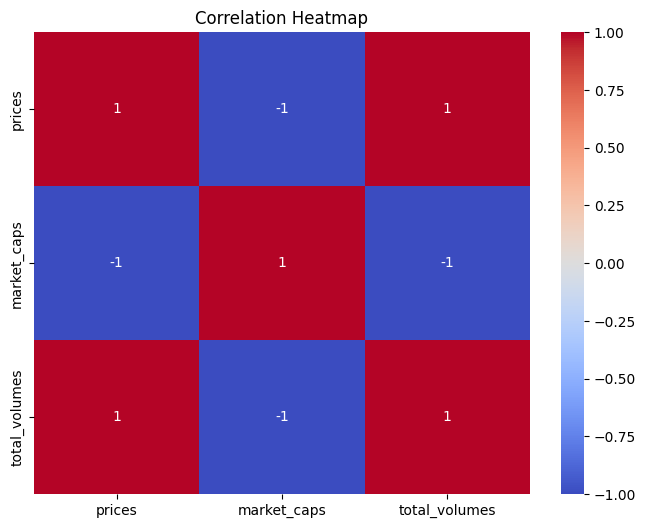

               prices  market_caps  total_volumes
prices            1.0         -1.0            1.0
market_caps      -1.0          1.0           -1.0
total_volumes     1.0         -1.0            1.0


In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el subconjunto de datos que contiene las columnas de interés
subset_df = projected_df[['prices', 'market_caps', 'total_volumes']]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título del heatmap
plt.title('Correlation Heatmap')

# Mostrar el heatmap
plt.show()
print(correlation_matrix)

d:\Data Scientist\CURSADO HENRY DTS09\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


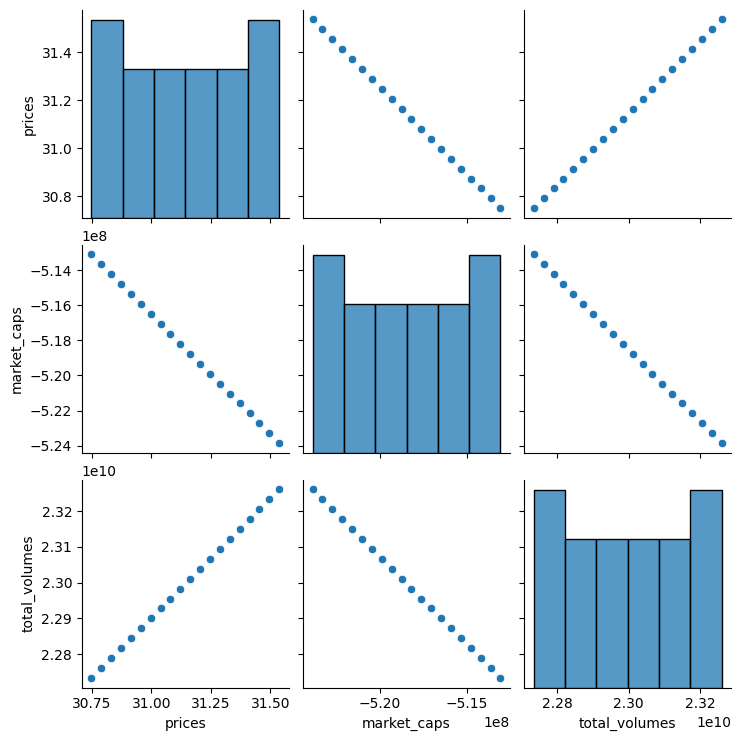

In [273]:
sns.pairplot(projected_df)

In [274]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Obtener los últimos 7 días del DataFrame
# last_7_days = projected_df.tail(7)

# # Crear una figura y ejes para el gráfico de precios
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los precios
# ax.plot(last_7_days['timestamp'], last_7_days['prices'], label='Prices')

# # Configurar las etiquetas y título del gráfico de precios
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 7 Days (Prices)')

# # Ajustar el espaciado de las marcas en el eje x
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Mostrar marcas diarias
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Mostrar marcas cada 12 horas

# # Formato de las etiquetas del eje x
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de precios
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios por hora
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Mostrar marcas por hora
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de precios
# plt.show()

# # Crear una figura y ejes para el gráfico de market_caps
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los market_caps
# ax.plot(last_7_days['timestamp'], last_7_days['market_caps'], label='Market Caps')

# # Configurar las etiquetas y título del gráfico de market_caps
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 7 Days (Market Caps)')

# # Ajustar el espaciado de las marcas en el eje x
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Mostrar marcas diarias
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Mostrar marcas cada 12 horas

# # Formato de las etiquetas del eje x
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de market_caps
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios por hora
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Mostrar marcas por hora
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de market_caps
# plt.show()

# # Crear una figura y ejes para el gráfico de total_volumes
# fig, ax = plt.subplots(figsize=(12, 6))

# # Graficar los total_volumes
# ax.plot(last_7_days['timestamp'], last_7_days['total_volumes'], label='Total Volumes')

# # Configurar las etiquetas y título del gráfico de total_volumes
# ax.set_xlabel('Timestamp')
# ax.set_ylabel('Value')
# ax.set_title('Bitcoin Data - Last 7 Days (Total Volumes)')

# # Ajustar el espaciado de las marcas en el eje x
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Mostrar marcas diarias
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=12))  # Mostrar marcas cada 12 horas

# # Formato de las etiquetas del eje x
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))

# # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xticks(rotation=45)

# # Activar la leyenda del gráfico de total_volumes
# ax.legend()

# # Agregar líneas secundarias para mostrar los cambios por hora
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Mostrar marcas por hora
# ax.yaxis.set_minor_locator(plt.MaxNLocator(6))
# ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

# # Mostrar el gráfico de total_volumes
# plt.show()



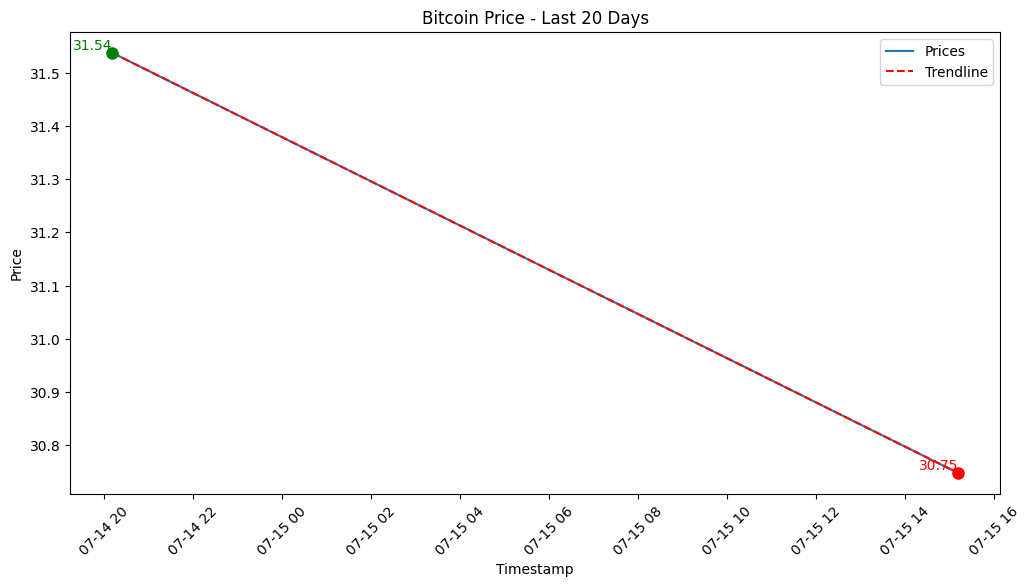

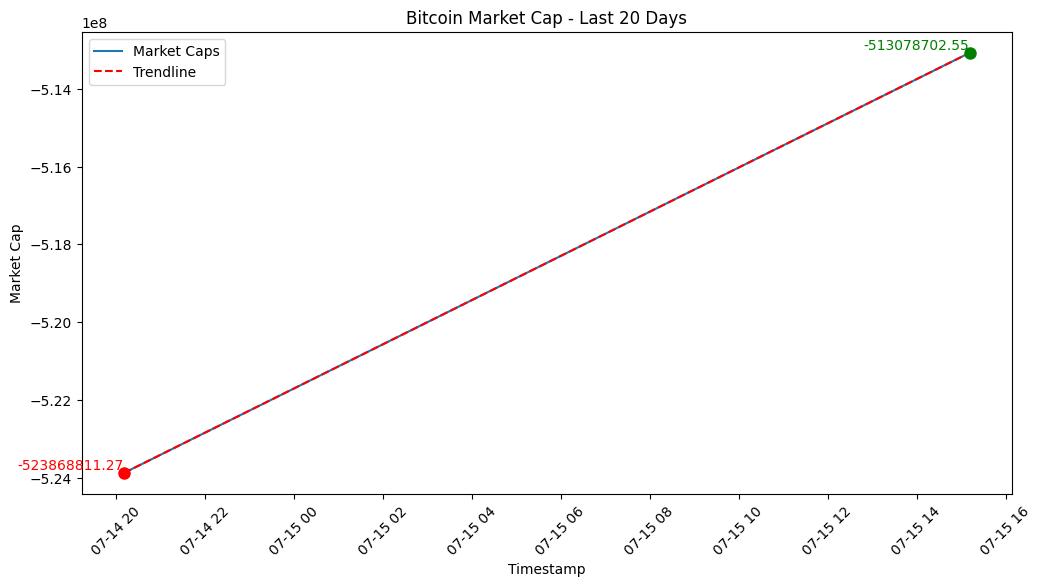

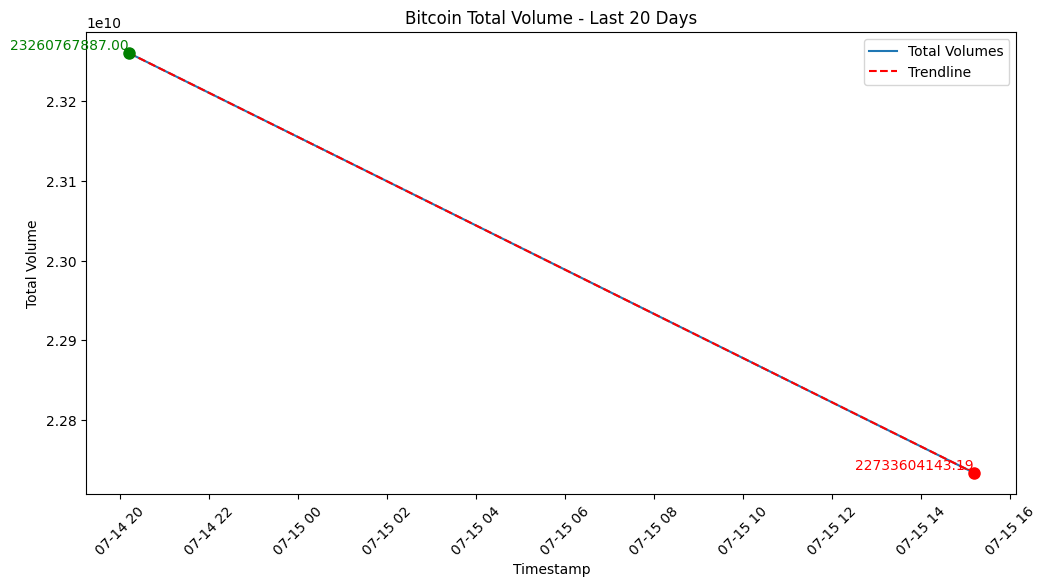

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los últimos 20 días del DataFrame projected_df
last_20_days = projected_df.tail(7*24).reset_index(drop=True)

# Crear una figura y ejes para el gráfico de precios
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los precios de los últimos 20 días
ax.plot(last_20_days['timestamp'], last_20_days['prices'], label='Prices')

# Calcular la línea de tendencia para los precios
x = np.arange(len(last_20_days))
coefficients = np.polyfit(x, last_20_days['prices'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_20_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Obtener los índices del mínimo y máximo para los últimos 20 días
min_index = last_20_days['prices'].idxmin()
max_index = last_20_days['prices'].idxmax()

# Obtener los valores del mínimo y máximo
min_price = last_20_days.loc[min_index, 'prices']
max_price = last_20_days.loc[max_index, 'prices']

# Graficar el punto mínimo
ax.plot(last_20_days.loc[min_index, 'timestamp'], min_price, marker='o', markersize=8, color='red')
# Imprimir el valor mínimo
ax.text(last_20_days.loc[min_index, 'timestamp'], min_price, f'{min_price:.2f}', ha='right', va='bottom', color='red')

# Graficar el punto máximo
ax.plot(last_20_days.loc[max_index, 'timestamp'], max_price, marker='o', markersize=8, color='green')
# Imprimir el valor máximo
ax.text(last_20_days.loc[max_index, 'timestamp'], max_price, f'{max_price:.2f}', ha='right', va='bottom', color='green')

# Configurar las etiquetas y título del gráfico de precios
ax.set_xlabel('Timestamp')
ax.set_ylabel('Price')
ax.set_title('Bitcoin Price - Last 20 Days')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de precios
ax.legend()

# Mostrar el gráfico de precios
plt.show()


# Crear una figura y ejes para el gráfico de market_caps
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los market_caps de los últimos 20 días
ax.plot(last_20_days['timestamp'], last_20_days['market_caps'], label='Market Caps')

# Calcular la línea de tendencia para los market_caps
coefficients = np.polyfit(x, last_20_days['market_caps'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_20_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Obtener los índices del mínimo y máximo para los últimos 20 días
min_index = last_20_days['market_caps'].idxmin()
max_index = last_20_days['market_caps'].idxmax()

# Obtener los valores del mínimo y máximo
min_market_cap = last_20_days.loc[min_index, 'market_caps']
max_market_cap = last_20_days.loc[max_index, 'market_caps']

# Graficar el punto mínimo
ax.plot(last_20_days.loc[min_index, 'timestamp'], min_market_cap, marker='o', markersize=8, color='red')
# Imprimir el valor mínimo
ax.text(last_20_days.loc[min_index, 'timestamp'], min_market_cap, f'{min_market_cap:.2f}', ha='right', va='bottom', color='red')

# Graficar el punto máximo
ax.plot(last_20_days.loc[max_index, 'timestamp'], max_market_cap, marker='o', markersize=8, color='green')
# Imprimir el valor máximo
ax.text(last_20_days.loc[max_index, 'timestamp'], max_market_cap, f'{max_market_cap:.2f}', ha='right', va='bottom', color='green')

# Configurar las etiquetas y título del gráfico de market_caps
ax.set_xlabel('Timestamp')
ax.set_ylabel('Market Cap')
ax.set_title('Bitcoin Market Cap - Last 20 Days')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de market_caps
ax.legend()

# Mostrar el gráfico de market_caps
plt.show()


# Crear una figura y ejes para el gráfico de total_volumes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los total_volumes de los últimos 20 días
ax.plot(last_20_days['timestamp'], last_20_days['total_volumes'], label='Total Volumes')

# Calcular la línea de tendencia para los total_volumes
coefficients = np.polyfit(x, last_20_days['total_volumes'], 1)
trendline = np.polyval(coefficients, x)
ax.plot(last_20_days['timestamp'], trendline, linestyle='--', color='red', label='Trendline')

# Obtener los índices del mínimo y máximo para los últimos 20 días
min_index = last_20_days['total_volumes'].idxmin()
max_index = last_20_days['total_volumes'].idxmax()

# Obtener los valores del mínimo y máximo
min_volume = last_20_days.loc[min_index, 'total_volumes']
max_volume = last_20_days.loc[max_index, 'total_volumes']

# Graficar el punto mínimo
ax.plot(last_20_days.loc[min_index, 'timestamp'], min_volume, marker='o', markersize=8, color='red')
# Imprimir el valor mínimo
ax.text(last_20_days.loc[min_index, 'timestamp'], min_volume, f'{min_volume:.2f}', ha='right', va='bottom', color='red')

# Graficar el punto máximo
ax.plot(last_20_days.loc[max_index, 'timestamp'], max_volume, marker='o', markersize=8, color='green')
# Imprimir el valor máximo
ax.text(last_20_days.loc[max_index, 'timestamp'], max_volume, f'{max_volume:.2f}', ha='right', va='bottom', color='green')

# Configurar las etiquetas y título del gráfico de total_volumes
ax.set_xlabel('Timestamp')
ax.set_ylabel('Total Volume')
ax.set_title('Bitcoin Total Volume - Last 20 Days')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Activar la leyenda del gráfico de total_volumes
ax.legend()

# Mostrar el gráfico de total_volumes
plt.show()


ahora quiero un grafico igual, pero por hora y que muestre unicamente las 97 ultimas horas registradas del dataframe, incluyendo las pronosticadas,quier hacer zoom , por asi decirlo, en estos ultimos momentos para ver bien el rendimiento del modelo

In [276]:
projected_df.tail(50)

,timestamp,prices,market_caps,total_volumes
0,2023-07-14 20:11:24,31.537091,-5.238688e+08,2.326077e+10
1,2023-07-14 21:11:24,31.495584,-5.233009e+08,2.323302e+10
2,2023-07-14 22:11:24,31.454076,-5.227330e+08,2.320528e+10
3,2023-07-14 23:11:24,31.412569,-5.221651e+08,2.317753e+10
4,2023-07-15 00:11:24,31.371062,-5.215972e+08,2.314979e+10
5,2023-07-15 01:11:24,31.329554,-5.210293e+08,2.312204e+10
6,2023-07-15 02:11:24,31.288047,-5.204614e+08,2.309430e+10
7,2023-07-15 03:11:24,31.246540,-5.198935e+08,2.306655e+10
8,2023-07-15 04:11:24,31.205032,-5.193256e+08,2.303880e+10
9,2023-07-15 05:11:24,31.163525,-5.187577e+08,2.301106e+10


# debo segui ajustando el modelo por hora, el modelo menusal parece andar ok.!

______________________________________________________________________________________________________________________